## 데이터 준비

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

In [2]:
data = pd.read_csv('./data/(전체) 국내차외제차 선호이유,소비패턴,소득.csv')
print(data.shape)
data.head()

(38596, 80)


,id,q1901,q190201,q190202,q190203,q190204_a,q190204,q190205,q190206,q190207,...,demo02,demo04,demo05,demo06,demo07,demo08,demo09,area07,d_sq02,d_q0116
0,1002486,새 차를 살 것이다,BMW,D-Seg,3 Series,3 Series,수입차,Imported,수입차,Import,...,30대,기혼,4명,자녀 성장기,사무/기술직,6~700만원 내외,경기,인천/경기,1대,SUV
1,1051671,새 차를 살 것이다,Audi,C-Seg,A3,A3,수입차,Imported,수입차,Import,...,40대,기혼,4명,자녀 성장기,판매/서비스직,8~1000만원 내외,서울,서울,2대,세단
2,1005553,새 차와 중고차를 모두 고려할 것이다,BMW,C-Seg,1 Series,1 Series,수입차,Imported,수입차,Import,...,30대,기혼,4명,신혼기,사무/기술직,400만원 내외,경상,인천/경기,1대,해치백
3,3031193,새 차와 중고차를 모두 고려할 것이다,BMW,D-Seg,1 Series,1 Series,수입차,Imported,수입차,Import,...,40대,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,경기,인천/경기,2대,해치백
4,1161159,새 차와 중고차를 모두 고려할 것이다,BMW,D-Seg,1 Series,1 Series,수입차,Imported,수입차,Import,...,40대,기혼,4명,자녀 성장기,자영업,500만원 내외,서울,서울,2대,세단


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38596 entries, 0 to 38595
Data columns (total 80 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         38596 non-null  int64 
 1   q1901      38596 non-null  object
 2   q190201    38596 non-null  object
 3   q190202    38596 non-null  object
 4   q190203    38596 non-null  object
 5   q190204_a  38596 non-null  object
 6   q190204    38596 non-null  object
 7   q190205    38596 non-null  object
 8   q190206    38596 non-null  object
 9   q190207    38596 non-null  object
 10  q190208    38596 non-null  object
 11  q190209    38596 non-null  object
 12  q190210    38596 non-null  object
 13  q190211    38596 non-null  object
 14  q190212    38596 non-null  object
 15  q190213    38596 non-null  object
 16  q1903      38596 non-null  object
 17  q19070201  38596 non-null  object
 18  q19070202  38596 non-null  object
 19  q19070301  38596 non-null  object
 20  q19070302  38596 non-null  o

In [4]:
data[data == '#NULL!'] = np.nan

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38596 entries, 0 to 38595
Data columns (total 80 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         38596 non-null  int64 
 1   q1901      38596 non-null  object
 2   q190201    38596 non-null  object
 3   q190202    35880 non-null  object
 4   q190203    38596 non-null  object
 5   q190204_a  38596 non-null  object
 6   q190204    35880 non-null  object
 7   q190205    38596 non-null  object
 8   q190206    38596 non-null  object
 9   q190207    35880 non-null  object
 10  q190208    38596 non-null  object
 11  q190209    35880 non-null  object
 12  q190210    9162 non-null   object
 13  q190211    35880 non-null  object
 14  q190212    7764 non-null   object
 15  q190213    17231 non-null  object
 16  q1903      35880 non-null  object
 17  q19070201  9866 non-null   object
 18  q19070202  7772 non-null   object
 19  q19070301  4655 non-null   object
 20  q19070302  3256 non-null   o

In [6]:
columns = pd.read_excel('./data/국내차외제차 선호이유_소비패턴_소득.xlsx')
columns.head()

E:\anaconda3\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,Column_Id(칼럼번호),Column_Name(칼럼명),Data_Type(데이터형식),Length(길이),Code_Flag(코드여부),ID_Flag(개인/가명식별자여부),Explanation(설명),RP_Flag(대표컬럼여부)
0,1,ID,VARCHAR,100,N,N,고유 식별자,N
1,2,Q1901,VARCHAR,100,N,N,구입계획-새차 vs. 중고차 여부,N
2,3,Q190201,VARCHAR,100,N,N,구입계획 1위-제조회사,N
3,4,Q190202,VARCHAR,100,N,N,구입계획 1위-차급,N
4,5,Q190203,VARCHAR,100,N,N,구입계획 1위-모델,N


In [7]:
data.columns = columns.iloc[:, 6]

In [8]:
data.head()

Explanation(설명),고유 식별자,구입계획-새차 vs. 중고차 여부,구입계획 1위-제조회사,구입계획 1위-차급,구입계획 1위-모델,구입계획 1위-모델명,구입계획 1위-세단 vs. RV,구입계획 1위-모델,구입계획 1위-제조회사,구입계획 1위-차급2,...,연령[10세],결혼여부,동거가족수,가족상황,직업군,가구소득,지역[13개],지역 [7개],보유 승용차 대수,보유 차량 타입
0,1002486,새 차를 살 것이다,BMW,D-Seg,3 Series,3 Series,수입차,Imported,수입차,Import,...,30대,기혼,4명,자녀 성장기,사무/기술직,6~700만원 내외,경기,인천/경기,1대,SUV
1,1051671,새 차를 살 것이다,Audi,C-Seg,A3,A3,수입차,Imported,수입차,Import,...,40대,기혼,4명,자녀 성장기,판매/서비스직,8~1000만원 내외,서울,서울,2대,세단
2,1005553,새 차와 중고차를 모두 고려할 것이다,BMW,C-Seg,1 Series,1 Series,수입차,Imported,수입차,Import,...,30대,기혼,4명,신혼기,사무/기술직,400만원 내외,경상,인천/경기,1대,해치백
3,3031193,새 차와 중고차를 모두 고려할 것이다,BMW,D-Seg,1 Series,1 Series,수입차,Imported,수입차,Import,...,40대,NaN,NaN,NaN,NaN,NaN,경기,인천/경기,2대,해치백
4,1161159,새 차와 중고차를 모두 고려할 것이다,BMW,D-Seg,1 Series,1 Series,수입차,Imported,수입차,Import,...,40대,기혼,4명,자녀 성장기,자영업,500만원 내외,서울,서울,2대,세단


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38596 entries, 0 to 38595
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   고유 식별자                       38596 non-null  int64 
 1   구입계획-새차 vs. 중고차 여부           38596 non-null  object
 2   구입계획 1위-제조회사                 38596 non-null  object
 3   구입계획 1위-차급                   35880 non-null  object
 4   구입계획 1위-모델                   38596 non-null  object
 5   구입계획 1위-모델명                  38596 non-null  object
 6   구입계획 1위-세단 vs. RV            35880 non-null  object
 7   구입계획 1위-모델                   38596 non-null  object
 8   구입계획 1위-제조회사                 38596 non-null  object
 9   구입계획 1위-차급2                  35880 non-null  object
 10  구입계획 1위-국산 vs. 수입            38596 non-null  object
 11  구입계획 1위-제조국                  35880 non-null  object
 12  구입계획 1위-수입차 Mass vs. Luxury  9162 non-null   object
 13  구입계획 1위-제조국                  35

## 전처리

In [10]:
data.columns

Index(['고유 식별자', '구입계획-새차 vs. 중고차 여부', '구입계획 1위-제조회사', '구입계획 1위-차급',
       '구입계획 1위-모델', '구입계획 1위-모델명', '구입계획 1위-세단 vs. RV', '구입계획 1위-모델',
       '구입계획 1위-제조회사', '구입계획 1위-차급2', '구입계획 1위-국산 vs. 수입', '구입계획 1위-제조국',
       '구입계획 1위-수입차 Mass vs. Luxury', '구입계획 1위-제조국', '구입계획 1위-판매가격대',
       '구입계획 1위-현대/제네시스 구분', '구입계획 1위-구입의향 이유(1순위)',
       '구입계획 1위-하이브리드 구입의향 이유_1순위', '구입계획 1위-하이브리드 구입의향 이유_2순위',
       '구입계획 1위-전기차 구입의향 이유_1순위', '구입계획 1위-전기차 구입의향 이유_2순위',
       '구입계획 1위-전기차 구입의향 이유_3순위', '구입계획 2위-제조회사', '구입계획 2위-차급', '구입계획 2위-모델',
       '구입계획 2위-모델명', '구입계획 2위-세단 vs. RV', '구입계획 2위-모델', '구입계획 2위-제조회사',
       '구입계획 2위-차급2', '구입계획 2위-국산 vs. 수입', '구입계획 2위-제조국',
       '구입계획 2위-수입차 Mass vs. Luxury', '구입계획 2위-제조국', '구입계획 2위-판매가격대',
       '구입계획 2위-현대/제네시스 구분', '구입계획(수입차)-수입차 고려 주이유', '구입계획(국산차)-수입차 비고려 주이유',
       '라이프스타일-소비생활(1순위)', '라이프스타일-소비생활(2순위)', '라이프스타일-소비생활(3순위)',
       '라이프스타일-소비생활', '라이프스타일-소비생활', '라이프스타일-소비생활', '라이프스타일-소비생활',
       '라이프스타일-소비생활', '라이프스타일-일상생활(1순위)', '라이프

In [11]:
# 사용할 컬럼만 뽑아내기
# 이름이 같은 컬럼 중 수입차의 값을 '수입', 'Import' 등으로 통일해둔 컬럼은 제외한다.
df = data[['구입계획 1위-제조회사', '구입계획 1위-모델', '구입계획 1위-국산 vs. 수입', '구입계획 1위-구입의향 이유(1순위)', '구입계획 1위-하이브리드 구입의향 이유_1순위', 
           '구입계획 1위-전기차 구입의향 이유_1순위', '구입계획 2위-국산 vs. 수입', '구입계획(수입차)-수입차 고려 주이유', 
           '라이프스타일-소비생활(1순위)', '라이프스타일-일상생활(1순위)', '라이프스타일-커뮤니케이션(1순위)', '라이프스타일-보유차량 인식', '라이프스타일-자동차 인식', 
           '자동차 구입행동-제품 vs. 회사', '자동차 구입행동-주변평가 vs. 개성', '자동차 구입행동-고가첨단기능 vs. 저가기본기능', '자동차 구입행동-최신모델 vs. 검증모델', 
           '자동차 구입행동-디자인우선 vs. 성능/품질우선', '자동차 구입행동-성능 vs. 유지비', '자동차 구입행동-다이나믹 vs. 안락성', '자동차 구입행동-인기 vs. 희소성',
           '자동차 구입행동-운전자 편리 vs. 동승자 편리', '자동차 구입행동-독특한 vs. 무난한', '자동차 구입행동-안전성 vs. 디자인', 
           '성별', '연령[10세]', '결혼여부', '동거가족수','가족상황', '가구소득', '보유 승용차 대수', '보유 차량 타입']]
df = pd.concat([df.iloc[:, 0], df.iloc[:, 2], df.iloc[:, 4:]], axis=1)
df

,구입계획 1위-제조회사,구입계획 1위-모델,구입계획 1위-국산 vs. 수입,구입계획 1위-구입의향 이유(1순위),구입계획 1위-하이브리드 구입의향 이유_1순위,구입계획 1위-전기차 구입의향 이유_1순위,구입계획 2위-국산 vs. 수입,구입계획(수입차)-수입차 고려 주이유,라이프스타일-소비생활(1순위),라이프스타일-일상생활(1순위),...,자동차 구입행동-독특한 vs. 무난한,자동차 구입행동-안전성 vs. 디자인,성별,연령[10세],결혼여부,동거가족수,가족상황,가구소득,보유 승용차 대수,보유 차량 타입
0,BMW,3 Series,수입,가격/구입조건이 좋아서,NaN,NaN,수입,나 스스로 프라이드를 가져서,새로운 패션이나 유행을 비교적 빨리 받아 들인다,"주말, 연휴에는 교외로 나가는 것을 좋아한다",...,차별적/독특한 디자인,안전성 보다 디자인이 마음에 드는 차,남성,30대,기혼,4명,자녀 성장기,6~700만원 내외,1대,SUV
1,Audi,A3,수입,내구성이 좋을 것 같아서,NaN,NaN,국산,국산과의 가격차가 줄어 부담이 줄어서,제품을 선택할 때 품질을 제일 중요하게 고려한다,"주말, 연휴에는 교외로 나가는 것을 좋아한다",...,튀지 않는/무난한 디자인,디자인 보다 안전성이 뛰어난 차,남성,40대,기혼,4명,자녀 성장기,8~1000만원 내외,2대,세단
2,BMW,1 Series,수입,회사/브랜드가 마음에 들어서,NaN,NaN,국산,품질이 좋아서,상품을 구입하기 전에 관련 정보를 많이 알아 본다,"나는 영화, 연극, 뮤지컬 등의 문화생활을 가급적 즐기려 한다",...,차별적/독특한 디자인,안전성 보다 디자인이 마음에 드는 차,남성,30대,기혼,4명,신혼기,400만원 내외,1대,해치백
3,BMW,1 Series,수입,모델의 명성/평판이 좋아서,NaN,NaN,없음,성능이 좋아서,NaN,NaN,...,NaN,NaN,남성,40대,NaN,NaN,NaN,NaN,2대,해치백
4,BMW,1 Series,수입,품질이 좋아서(잔고장 적음),NaN,NaN,국산,국산과의 가격차가 줄어 부담이 줄어서,상품을 구입하기 전에 관련 정보를 많이 알아 본다,"주말, 연휴에는 교외로 나가는 것을 좋아한다",...,튀지 않는/무난한 디자인,디자인 보다 안전성이 뛰어난 차,남성,40대,기혼,4명,자녀 성장기,500만원 내외,2대,세단
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38591,현대,현대 기타,국산,신모델/최신모델이어서,NaN,NaN,국산,NaN,상품을 구입하기 전에 관련 정보를 많이 알아 본다,여가 시간에는 주로 집에서 조용하게 지내는 편이다,...,차별적/독특한 디자인,안전성 보다 디자인이 마음에 드는 차,남성,40대,미혼,2명이하,1인 가구,400만원 내외,1대,세단
38592,현대,현대 기타,국산,첨단/편의사양이 좋아서,NaN,NaN,없음,NaN,새로운 상품이 나오면 먼저 사는 편이다,"나는 영화, 연극, 뮤지컬 등의 문화생활을 가급적 즐기려 한다",...,차별적/독특한 디자인,안전성 보다 디자인이 마음에 드는 차,남성,30대,미혼,3명,자녀 성인기,8~1000만원 내외,2대,해치백
38593,현대,현대 기타,국산,가격/구입조건이 좋아서,NaN,NaN,국산,NaN,상품을 구입하기 전에 관련 정보를 많이 알아 본다,"주말, 연휴에는 교외로 나가는 것을 좋아한다",...,튀지 않는/무난한 디자인,디자인 보다 안전성이 뛰어난 차,남성,30대,미혼,2명이하,1인 가구,250만원 이하,없음,NaN
38594,현대,현대 기타,국산,첨단/편의사양이 좋아서,NaN,NaN,국산,NaN,상품을 구입하기 전에 관련 정보를 많이 알아 본다,여가 시간에는 주로 집에서 조용하게 지내는 편이다,...,튀지 않는/무난한 디자인,디자인 보다 안전성이 뛰어난 차,남성,60대이상,기혼,4명,자녀 성인기,400만원 내외,1대,세단


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38596 entries, 0 to 38595
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   구입계획 1위-제조회사                38596 non-null  object
 1   구입계획 1위-모델                  38596 non-null  object
 2   구입계획 1위-국산 vs. 수입           38596 non-null  object
 3   구입계획 1위-구입의향 이유(1순위)        35880 non-null  object
 4   구입계획 1위-하이브리드 구입의향 이유_1순위   9866 non-null   object
 5   구입계획 1위-전기차 구입의향 이유_1순위     4655 non-null   object
 6   구입계획 2위-국산 vs. 수입           38596 non-null  object
 7   구입계획(수입차)-수입차 고려 주이유        13715 non-null  object
 8   라이프스타일-소비생활(1순위)            37900 non-null  object
 9   라이프스타일-일상생활(1순위)            37902 non-null  object
 10  라이프스타일-커뮤니케이션(1순위)          37901 non-null  object
 11  라이프스타일-보유차량 인식              37900 non-null  object
 12  라이프스타일-자동차 인식               37902 non-null  object
 13  자동차 구입행동-제품 vs. 회사          37871 non-null  ob

### null값 처리

In [13]:
df.isnull().sum()

구입계획 1위-제조회사                      0
구입계획 1위-모델                        0
구입계획 1위-국산 vs. 수입                 0
구입계획 1위-구입의향 이유(1순위)           2716
구입계획 1위-하이브리드 구입의향 이유_1순위     28730
구입계획 1위-전기차 구입의향 이유_1순위       33941
구입계획 2위-국산 vs. 수입                 0
구입계획(수입차)-수입차 고려 주이유          24881
라이프스타일-소비생활(1순위)                696
라이프스타일-일상생활(1순위)                694
라이프스타일-커뮤니케이션(1순위)              695
라이프스타일-보유차량 인식                  696
라이프스타일-자동차 인식                   694
자동차 구입행동-제품 vs. 회사              725
자동차 구입행동-주변평가 vs. 개성            725
자동차 구입행동-고가첨단기능 vs. 저가기본기능      725
자동차 구입행동-최신모델 vs. 검증모델          725
자동차 구입행동-디자인우선 vs. 성능/품질우선      725
자동차 구입행동-성능 vs. 유지비             725
자동차 구입행동-다이나믹 vs. 안락성           725
자동차 구입행동-인기 vs. 희소성             725
자동차 구입행동-운전자 편리 vs. 동승자 편리      725
자동차 구입행동-독특한 vs. 무난한            725
자동차 구입행동-안전성 vs. 디자인            725
성별                                0
연령[10세]                           0
결혼여부                            778
동거가족수                       

'구입계획 1위-하이브리드 구입의향 이유_1순위', '구입계획 1위-전기차 구입의향 이유_1순위', '구입계획(수입차)-수입차 고려 주이유', '보유 차량 타입'의 널값은 제거하지 않고 후에 다른 값으로 대체한다.

In [14]:
df.columns

Index(['구입계획 1위-제조회사', '구입계획 1위-모델', '구입계획 1위-국산 vs. 수입',
       '구입계획 1위-구입의향 이유(1순위)', '구입계획 1위-하이브리드 구입의향 이유_1순위',
       '구입계획 1위-전기차 구입의향 이유_1순위', '구입계획 2위-국산 vs. 수입', '구입계획(수입차)-수입차 고려 주이유',
       '라이프스타일-소비생활(1순위)', '라이프스타일-일상생활(1순위)', '라이프스타일-커뮤니케이션(1순위)',
       '라이프스타일-보유차량 인식', '라이프스타일-자동차 인식', '자동차 구입행동-제품 vs. 회사',
       '자동차 구입행동-주변평가 vs. 개성', '자동차 구입행동-고가첨단기능 vs. 저가기본기능',
       '자동차 구입행동-최신모델 vs. 검증모델', '자동차 구입행동-디자인우선 vs. 성능/품질우선',
       '자동차 구입행동-성능 vs. 유지비', '자동차 구입행동-다이나믹 vs. 안락성', '자동차 구입행동-인기 vs. 희소성',
       '자동차 구입행동-운전자 편리 vs. 동승자 편리', '자동차 구입행동-독특한 vs. 무난한',
       '자동차 구입행동-안전성 vs. 디자인', '성별', '연령[10세]', '결혼여부', '동거가족수', '가족상황',
       '가구소득', '보유 승용차 대수', '보유 차량 타입'],
      dtype='object')

In [15]:
# dropna로 null값 제거
df.dropna(subset=['구입계획 1위-구입의향 이유(1순위)', '라이프스타일-소비생활(1순위)', '라이프스타일-일상생활(1순위)',
       '라이프스타일-커뮤니케이션(1순위)', '라이프스타일-보유차량 인식', '라이프스타일-자동차 인식',
       '자동차 구입행동-제품 vs. 회사', '자동차 구입행동-주변평가 vs. 개성',
       '자동차 구입행동-고가첨단기능 vs. 저가기본기능', '자동차 구입행동-최신모델 vs. 검증모델',
       '자동차 구입행동-디자인우선 vs. 성능/품질우선', '자동차 구입행동-성능 vs. 유지비',
       '자동차 구입행동-다이나믹 vs. 안락성', '자동차 구입행동-인기 vs. 희소성',
       '자동차 구입행동-운전자 편리 vs. 동승자 편리', '자동차 구입행동-독특한 vs. 무난한',
       '자동차 구입행동-안전성 vs. 디자인', '결혼여부', '동거가족수', '가족상황',
       '가구소득'], axis=0, inplace=True)
df

,구입계획 1위-제조회사,구입계획 1위-모델,구입계획 1위-국산 vs. 수입,구입계획 1위-구입의향 이유(1순위),구입계획 1위-하이브리드 구입의향 이유_1순위,구입계획 1위-전기차 구입의향 이유_1순위,구입계획 2위-국산 vs. 수입,구입계획(수입차)-수입차 고려 주이유,라이프스타일-소비생활(1순위),라이프스타일-일상생활(1순위),...,자동차 구입행동-독특한 vs. 무난한,자동차 구입행동-안전성 vs. 디자인,성별,연령[10세],결혼여부,동거가족수,가족상황,가구소득,보유 승용차 대수,보유 차량 타입
0,BMW,3 Series,수입,가격/구입조건이 좋아서,NaN,NaN,수입,나 스스로 프라이드를 가져서,새로운 패션이나 유행을 비교적 빨리 받아 들인다,"주말, 연휴에는 교외로 나가는 것을 좋아한다",...,차별적/독특한 디자인,안전성 보다 디자인이 마음에 드는 차,남성,30대,기혼,4명,자녀 성장기,6~700만원 내외,1대,SUV
1,Audi,A3,수입,내구성이 좋을 것 같아서,NaN,NaN,국산,국산과의 가격차가 줄어 부담이 줄어서,제품을 선택할 때 품질을 제일 중요하게 고려한다,"주말, 연휴에는 교외로 나가는 것을 좋아한다",...,튀지 않는/무난한 디자인,디자인 보다 안전성이 뛰어난 차,남성,40대,기혼,4명,자녀 성장기,8~1000만원 내외,2대,세단
2,BMW,1 Series,수입,회사/브랜드가 마음에 들어서,NaN,NaN,국산,품질이 좋아서,상품을 구입하기 전에 관련 정보를 많이 알아 본다,"나는 영화, 연극, 뮤지컬 등의 문화생활을 가급적 즐기려 한다",...,차별적/독특한 디자인,안전성 보다 디자인이 마음에 드는 차,남성,30대,기혼,4명,신혼기,400만원 내외,1대,해치백
4,BMW,1 Series,수입,품질이 좋아서(잔고장 적음),NaN,NaN,국산,국산과의 가격차가 줄어 부담이 줄어서,상품을 구입하기 전에 관련 정보를 많이 알아 본다,"주말, 연휴에는 교외로 나가는 것을 좋아한다",...,튀지 않는/무난한 디자인,디자인 보다 안전성이 뛰어난 차,남성,40대,기혼,4명,자녀 성장기,500만원 내외,2대,세단
5,BMW,1 Series,수입,외관스타일이 마음에 들어서,NaN,NaN,국산,탈만한 국산차가 없어서,제품을 선택할 때 품질을 제일 중요하게 고려한다,"주말, 연휴에는 교외로 나가는 것을 좋아한다",...,튀지 않는/무난한 디자인,안전성 보다 디자인이 마음에 드는 차,여성,40대,미혼,2명이하,1인 가구,6~700만원 내외,1대,세단
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38591,현대,현대 기타,국산,신모델/최신모델이어서,NaN,NaN,국산,NaN,상품을 구입하기 전에 관련 정보를 많이 알아 본다,여가 시간에는 주로 집에서 조용하게 지내는 편이다,...,차별적/독특한 디자인,안전성 보다 디자인이 마음에 드는 차,남성,40대,미혼,2명이하,1인 가구,400만원 내외,1대,세단
38592,현대,현대 기타,국산,첨단/편의사양이 좋아서,NaN,NaN,없음,NaN,새로운 상품이 나오면 먼저 사는 편이다,"나는 영화, 연극, 뮤지컬 등의 문화생활을 가급적 즐기려 한다",...,차별적/독특한 디자인,안전성 보다 디자인이 마음에 드는 차,남성,30대,미혼,3명,자녀 성인기,8~1000만원 내외,2대,해치백
38593,현대,현대 기타,국산,가격/구입조건이 좋아서,NaN,NaN,국산,NaN,상품을 구입하기 전에 관련 정보를 많이 알아 본다,"주말, 연휴에는 교외로 나가는 것을 좋아한다",...,튀지 않는/무난한 디자인,디자인 보다 안전성이 뛰어난 차,남성,30대,미혼,2명이하,1인 가구,250만원 이하,없음,NaN
38594,현대,현대 기타,국산,첨단/편의사양이 좋아서,NaN,NaN,국산,NaN,상품을 구입하기 전에 관련 정보를 많이 알아 본다,여가 시간에는 주로 집에서 조용하게 지내는 편이다,...,튀지 않는/무난한 디자인,디자인 보다 안전성이 뛰어난 차,남성,60대이상,기혼,4명,자녀 성인기,400만원 내외,1대,세단


In [16]:
df.isnull().sum()

구입계획 1위-제조회사                      0
구입계획 1위-모델                        0
구입계획 1위-국산 vs. 수입                 0
구입계획 1위-구입의향 이유(1순위)              0
구입계획 1위-하이브리드 구입의향 이유_1순위     26159
구입계획 1위-전기차 구입의향 이유_1순위       31012
구입계획 2위-국산 vs. 수입                 0
구입계획(수입차)-수입차 고려 주이유          22804
라이프스타일-소비생활(1순위)                  0
라이프스타일-일상생활(1순위)                  0
라이프스타일-커뮤니케이션(1순위)                0
라이프스타일-보유차량 인식                    0
라이프스타일-자동차 인식                     0
자동차 구입행동-제품 vs. 회사                0
자동차 구입행동-주변평가 vs. 개성              0
자동차 구입행동-고가첨단기능 vs. 저가기본기능        0
자동차 구입행동-최신모델 vs. 검증모델            0
자동차 구입행동-디자인우선 vs. 성능/품질우선        0
자동차 구입행동-성능 vs. 유지비               0
자동차 구입행동-다이나믹 vs. 안락성             0
자동차 구입행동-인기 vs. 희소성               0
자동차 구입행동-운전자 편리 vs. 동승자 편리        0
자동차 구입행동-독특한 vs. 무난한              0
자동차 구입행동-안전성 vs. 디자인              0
성별                                0
연령[10세]                           0
결혼여부                              0
동거가족수                       

### 구입계획 1위-모델

In [17]:
df['구입계획 1위-모델'].nunique()

351

In [18]:
# 데이터에 있는 모델 목록
models = df['구입계획 1위-모델'].unique()
models.sort()
models

array(['1 Series', '2 Series', '2 Series Active Tourer', '3 Series',
       '3 Series GT', '3008', '300C', '4 Series', '407', '5 Series',
       '5 Series GT', '5008', '508', '5G 그랜저', '5G 그랜저 하이브리드', '6 Series',
       '6 Series GT', '7 Series', '8 Series', '911', 'A Class', 'A3',
       'A4', 'A5', 'A6', 'A7', 'A8', 'AMG GT', 'AX1 (21년 하반기 예정)',
       'Accord/ Accord Hybrid', 'All New SM7', 'Altima', 'Arteon',
       'Audi 기타', 'Aviator', 'B Class', 'BMW 기타', 'Bentley',
       'Boxter/ 718Boxter', 'Bronco (22년 예정)', 'C Class', 'C3 Aircross',
       'C5 Air Cross', 'C70', 'CC', 'CLA Class', 'CLK Class', 'CLS Class',
       'CR-V', 'CT5', 'CT6', 'CTS/ CTS-V', 'Camry/ Camry Hybrid',
       'Cayenne', 'Cayman', 'Cherokee', 'Chevrolet', 'Chrysler 기타',
       'Compass', 'Continental', 'Corsair', 'CyberTruck', 'DeVille',
       'Defender', 'Discovery', 'Discovery Sports', 'Dodge', 'E Class',
       'E-Pace', 'EQ900', 'EQA (21년 하반기 예정)', 'EQB (22년 예정)', 'EQC',
       'EQS (22년 예정)', 'ES', '

* 기타 모델은 drop
* 출시 예정이 적힌 모델은 다음자동차에 나온 이름으로 맞춰준다.
* 나머지 모델은 크롤링 해온 차량 성능 데이터에 있는 이름과 일치시킨다.

#### 기타 모델 drop

In [19]:
def drop_models(name):
    return name.find('기타')

In [20]:
df_dropmodels = df.drop(df[(df['구입계획 1위-모델'].map(drop_models) != -1)].index, axis=0)
df_dropmodels

,구입계획 1위-제조회사,구입계획 1위-모델,구입계획 1위-국산 vs. 수입,구입계획 1위-구입의향 이유(1순위),구입계획 1위-하이브리드 구입의향 이유_1순위,구입계획 1위-전기차 구입의향 이유_1순위,구입계획 2위-국산 vs. 수입,구입계획(수입차)-수입차 고려 주이유,라이프스타일-소비생활(1순위),라이프스타일-일상생활(1순위),...,자동차 구입행동-독특한 vs. 무난한,자동차 구입행동-안전성 vs. 디자인,성별,연령[10세],결혼여부,동거가족수,가족상황,가구소득,보유 승용차 대수,보유 차량 타입
0,BMW,3 Series,수입,가격/구입조건이 좋아서,NaN,NaN,수입,나 스스로 프라이드를 가져서,새로운 패션이나 유행을 비교적 빨리 받아 들인다,"주말, 연휴에는 교외로 나가는 것을 좋아한다",...,차별적/독특한 디자인,안전성 보다 디자인이 마음에 드는 차,남성,30대,기혼,4명,자녀 성장기,6~700만원 내외,1대,SUV
1,Audi,A3,수입,내구성이 좋을 것 같아서,NaN,NaN,국산,국산과의 가격차가 줄어 부담이 줄어서,제품을 선택할 때 품질을 제일 중요하게 고려한다,"주말, 연휴에는 교외로 나가는 것을 좋아한다",...,튀지 않는/무난한 디자인,디자인 보다 안전성이 뛰어난 차,남성,40대,기혼,4명,자녀 성장기,8~1000만원 내외,2대,세단
2,BMW,1 Series,수입,회사/브랜드가 마음에 들어서,NaN,NaN,국산,품질이 좋아서,상품을 구입하기 전에 관련 정보를 많이 알아 본다,"나는 영화, 연극, 뮤지컬 등의 문화생활을 가급적 즐기려 한다",...,차별적/독특한 디자인,안전성 보다 디자인이 마음에 드는 차,남성,30대,기혼,4명,신혼기,400만원 내외,1대,해치백
4,BMW,1 Series,수입,품질이 좋아서(잔고장 적음),NaN,NaN,국산,국산과의 가격차가 줄어 부담이 줄어서,상품을 구입하기 전에 관련 정보를 많이 알아 본다,"주말, 연휴에는 교외로 나가는 것을 좋아한다",...,튀지 않는/무난한 디자인,디자인 보다 안전성이 뛰어난 차,남성,40대,기혼,4명,자녀 성장기,500만원 내외,2대,세단
5,BMW,1 Series,수입,외관스타일이 마음에 들어서,NaN,NaN,국산,탈만한 국산차가 없어서,제품을 선택할 때 품질을 제일 중요하게 고려한다,"주말, 연휴에는 교외로 나가는 것을 좋아한다",...,튀지 않는/무난한 디자인,안전성 보다 디자인이 마음에 드는 차,여성,40대,미혼,2명이하,1인 가구,6~700만원 내외,1대,세단
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37927,기아,The New K3 (BD),국산,연비가 좋아서,NaN,NaN,국산,NaN,제품을 선택할 때 품질을 제일 중요하게 고려한다,여가 시간에는 주로 집에서 조용하게 지내는 편이다,...,튀지 않는/무난한 디자인,디자인 보다 안전성이 뛰어난 차,남성,30대,미혼,2명이하,1인 가구,250만원 이하,없음,NaN
37928,기아,K3,국산,연비가 좋아서,NaN,NaN,국산,NaN,유명 상표의 제품을 주로 산다,"골프, 등산, 스키 등 야외에서 하는 스포츠 활동을 즐긴다",...,튀지 않는/무난한 디자인,디자인 보다 안전성이 뛰어난 차,남성,40대,기혼,4명,자녀 유아기,1100만원 이상,1대,세단
37929,기아,K3,국산,중고차 가격이 좋을 것 같아서,NaN,NaN,국산,NaN,꼭 필요한 물건만 산다,"나는 영화, 연극, 뮤지컬 등의 문화생활을 가급적 즐기려 한다",...,차별적/독특한 디자인,안전성 보다 디자인이 마음에 드는 차,남성,30대,미혼,2명이하,1인 가구,500만원 내외,없음,NaN
37930,기아,The New K3 (BD),국산,연비가 좋아서,NaN,NaN,국산,NaN,상품을 구입하기 전에 관련 정보를 많이 알아 본다,여가 시간에는 주로 집에서 조용하게 지내는 편이다,...,튀지 않는/무난한 디자인,디자인 보다 안전성이 뛰어난 차,여성,40대,기혼,5명이상,자녀 성장기,6~700만원 내외,없음,NaN


In [21]:
models = df_dropmodels['구입계획 1위-모델'].unique()
models.sort()
models

array(['1 Series', '2 Series', '2 Series Active Tourer', '3 Series',
       '3 Series GT', '3008', '300C', '4 Series', '407', '5 Series',
       '5 Series GT', '5008', '508', '5G 그랜저', '5G 그랜저 하이브리드', '6 Series',
       '6 Series GT', '7 Series', '8 Series', '911', 'A Class', 'A3',
       'A4', 'A5', 'A6', 'A7', 'A8', 'AMG GT', 'AX1 (21년 하반기 예정)',
       'Accord/ Accord Hybrid', 'All New SM7', 'Altima', 'Arteon',
       'Aviator', 'B Class', 'Bentley', 'Boxter/ 718Boxter',
       'Bronco (22년 예정)', 'C Class', 'C3 Aircross', 'C5 Air Cross', 'C70',
       'CC', 'CLA Class', 'CLK Class', 'CLS Class', 'CR-V', 'CT5', 'CT6',
       'CTS/ CTS-V', 'Camry/ Camry Hybrid', 'Cayenne', 'Cayman',
       'Cherokee', 'Chevrolet', 'Compass', 'Continental', 'Corsair',
       'CyberTruck', 'DeVille', 'Defender', 'Discovery',
       'Discovery Sports', 'Dodge', 'E Class', 'E-Pace', 'EQ900',
       'EQA (21년 하반기 예정)', 'EQB (22년 예정)', 'EQC', 'EQS (22년 예정)', 'ES',
       'EV6 (CV, 21년 하반기 예정)', 'Escalade', '

#### 출시예정모델 수정하기

In [22]:
# 모델 수정을 위한 딕셔너리 생성
modeldict = {'AX1 (21년 하반기 예정)': '현대 캐스퍼 (1세대)',
             'Bronco (22년 예정)': '포드 브롱코 4도어 (6세대)',
             'EQA (21년 하반기 예정)': '벤츠 EQA (1세대)',
             'EQB (22년 예정)': '벤츠 EQB (1세대)',
             'EQS (22년 예정)': '벤츠 EQS (1세대)',
             'EV6 (CV, 21년 하반기 예정)': '기아 EV6 (1세대)',
             'G80 전기차 (RG3, 21년 하반기 예정)': '제네시스 일렉트리파이드 G80 (3세대)',
             'G90 후속 (RS4, 21년 하반기 예정)': '제네시스 G90 (4세대)', 
             'GV60 (JW, 21년 하반기 예정)': '제네시스 GV60 (1세대)', 
             'GV70 전기차 (JK1, 21년 하반기 예정)': '제네시스 일렉트리파이드 GV70 (1세대)',
             'ID.3 (21년 하반기 예정)': '폭스바겐 ID.3 (1세대)',
             # 'ID.4 (22년 예정)': '폭스바겐 ID.4 (1세대)': 미출시,
             # 'XM3 하이브리드 (21년 하반기 예정)': 미출시,
             'e-Tron GT (21년 하반기 예정)': '아우디 e-트론 GT (1세대)',
             'i4 (21년 하반기 예정)': 'BMW i4 (1세대)',
             'iX (21년 하반기 예정)': 'BMW iX (1세대)',
             'iX3 (21년 하반기 예정)': 'BMW iX3 (3세대)', 
             # '그랜저 (UN7, 7세대, 22년 예정)': 미출시,
             # '그랜저 하이브리드 (UN7, 7세대, 22년 예정)': 미출시,
             '니로 EV 후속 (SG2, 21년 하반기 예정)': '기아 니로 EV (2세대)', 
             '니로 후속 (SG2, 21년 하반기 예정)': '기아 니로 하이브리드 (2세대)',
             '볼트 EUV (22년 하반기 예정)': '쉐보레 볼트 EUV (1세대)',
             '스포티지 하이브리드 (NQ5, 21년 하반기 예정)': '기아 스포티지 하이브리드 (5세대)', 
             '스포티지 후속 (NQ5, 21년 하반기 예정)': '기아 스포티지 (5세대)', 
             '싼타페 하이브리드 (TM, 21년 하반기 예정)': '현대 싼타페 하이브리드 F/L (4세대)', 
             # '쏘나타 (DN8) 플러그인 하이브리드 (21년 하반기 예정)': 정보 찾을 수 없음,
             '아이오닉 6 (CE1, 22년 예정)': '현대 아이오닉 6 (1세대)',
             # '카니발 하이브리드 (KA4, 21년 하반기 예정)': 미출시,
             '코나 N (21년 하반기 예정)': '현대 코나 N (1세대)',
             '코란도 E-모션 (E100, 21년 하반기 예정)': '쌍용 코란도 이모션 (1세대)',
             '타호 (21년 하반기 예정)': '쉐보레 타호 (5세대)', 
             # '텔루라이드 (21년 예정)': 한국 출시 미정,
            }
modeldict

{'AX1 (21년 하반기 예정)': '현대 캐스퍼 (1세대)',
 'Bronco (22년 예정)': '포드 브롱코 4도어 (6세대)',
 'EQA (21년 하반기 예정)': '벤츠 EQA (1세대)',
 'EQB (22년 예정)': '벤츠 EQB (1세대)',
 'EQS (22년 예정)': '벤츠 EQS (1세대)',
 'EV6 (CV, 21년 하반기 예정)': '기아 EV6 (1세대)',
 'G80 전기차 (RG3, 21년 하반기 예정)': '제네시스 일렉트리파이드 G80 (3세대)',
 'G90 후속 (RS4, 21년 하반기 예정)': '제네시스 G90 (4세대)',
 'GV60 (JW, 21년 하반기 예정)': '제네시스 GV60 (1세대)',
 'GV70 전기차 (JK1, 21년 하반기 예정)': '제네시스 일렉트리파이드 GV70 (1세대)',
 'ID.3 (21년 하반기 예정)': '폭스바겐 ID.3 (1세대)',
 'e-Tron GT (21년 하반기 예정)': '아우디 e-트론 GT (1세대)',
 'i4 (21년 하반기 예정)': 'BMW i4 (1세대)',
 'iX (21년 하반기 예정)': 'BMW iX (1세대)',
 'iX3 (21년 하반기 예정)': 'BMW iX3 (3세대)',
 '니로 EV 후속 (SG2, 21년 하반기 예정)': '기아 니로 EV (2세대)',
 '니로 후속 (SG2, 21년 하반기 예정)': '기아 니로 하이브리드 (2세대)',
 '볼트 EUV (22년 하반기 예정)': '쉐보레 볼트 EUV (1세대)',
 '스포티지 하이브리드 (NQ5, 21년 하반기 예정)': '기아 스포티지 하이브리드 (5세대)',
 '스포티지 후속 (NQ5, 21년 하반기 예정)': '기아 스포티지 (5세대)',
 '싼타페 하이브리드 (TM, 21년 하반기 예정)': '현대 싼타페 하이브리드 F/L (4세대)',
 '아이오닉 6 (CE1, 22년 예정)': '현대 아이오닉 6 (1세대)',
 '코나 N (21년 하반기 예정)': '현대 코나

In [23]:
# 출시예정인 모델 이름 수정
df_newmodels = df_dropmodels.copy()
df_newmodels['구입계획 1위-모델'].replace(modeldict.keys(), modeldict.values(), inplace=True)

In [25]:
models = df_newmodels['구입계획 1위-모델'].unique()
models.sort()
models

array(['1 Series', '2 Series', '2 Series Active Tourer', '3 Series',
       '3 Series GT', '3008', '300C', '4 Series', '407', '5 Series',
       '5 Series GT', '5008', '508', '5G 그랜저', '5G 그랜저 하이브리드', '6 Series',
       '6 Series GT', '7 Series', '8 Series', '911', 'A Class', 'A3',
       'A4', 'A5', 'A6', 'A7', 'A8', 'AMG GT', 'Accord/ Accord Hybrid',
       'All New SM7', 'Altima', 'Arteon', 'Aviator', 'B Class',
       'BMW i4 (1세대)', 'BMW iX (1세대)', 'BMW iX3 (3세대)', 'Bentley',
       'Boxter/ 718Boxter', 'C Class', 'C3 Aircross', 'C5 Air Cross',
       'C70', 'CC', 'CLA Class', 'CLK Class', 'CLS Class', 'CR-V', 'CT5',
       'CT6', 'CTS/ CTS-V', 'Camry/ Camry Hybrid', 'Cayenne', 'Cayman',
       'Cherokee', 'Chevrolet', 'Compass', 'Continental', 'Corsair',
       'CyberTruck', 'DeVille', 'Defender', 'Discovery',
       'Discovery Sports', 'Dodge', 'E Class', 'E-Pace', 'EQ900', 'EQC',
       'ES', 'Escalade', 'Expedition', 'Explorer', 'F-Pace', 'F-Type',
       'G Class', 'G4 렉스턴', 

In [26]:
# 미출시된 차량은 drop
notout_list = ['ID.4 (22년 예정)',
               'XM3 하이브리드 (21년 하반기 예정)',
               '그랜저 (UN7, 7세대, 22년 예정)', 
               '그랜저 하이브리드 (UN7, 7세대, 22년 예정)',
               '쏘나타 (DN8) 플러그인 하이브리드 (21년 하반기 예정)',
               '카니발 하이브리드 (KA4, 21년 하반기 예정)',
               '텔루라이드 (21년 예정)']

In [27]:
df_newmodels.drop(df_newmodels[df_newmodels['구입계획 1위-모델'].isin(notout_list)].index, axis=0, inplace=True)
models = df_newmodels['구입계획 1위-모델'].unique()
models.sort()
models

array(['1 Series', '2 Series', '2 Series Active Tourer', '3 Series',
       '3 Series GT', '3008', '300C', '4 Series', '407', '5 Series',
       '5 Series GT', '5008', '508', '5G 그랜저', '5G 그랜저 하이브리드', '6 Series',
       '6 Series GT', '7 Series', '8 Series', '911', 'A Class', 'A3',
       'A4', 'A5', 'A6', 'A7', 'A8', 'AMG GT', 'Accord/ Accord Hybrid',
       'All New SM7', 'Altima', 'Arteon', 'Aviator', 'B Class',
       'BMW i4 (1세대)', 'BMW iX (1세대)', 'BMW iX3 (3세대)', 'Bentley',
       'Boxter/ 718Boxter', 'C Class', 'C3 Aircross', 'C5 Air Cross',
       'C70', 'CC', 'CLA Class', 'CLK Class', 'CLS Class', 'CR-V', 'CT5',
       'CT6', 'CTS/ CTS-V', 'Camry/ Camry Hybrid', 'Cayenne', 'Cayman',
       'Cherokee', 'Chevrolet', 'Compass', 'Continental', 'Corsair',
       'CyberTruck', 'DeVille', 'Defender', 'Discovery',
       'Discovery Sports', 'Dodge', 'E Class', 'E-Pace', 'EQ900', 'EQC',
       'ES', 'Escalade', 'Expedition', 'Explorer', 'F-Pace', 'F-Type',
       'G Class', 'G4 렉스턴', 

#### 모델명 차량 성능 데이터와 일치시키기

In [28]:
# 차량 성능 데이터 불러오기
data_car = pd.read_csv('./data/car_crawling_new_final_3.csv', encoding='cp949')
data_car

,모델명,가격,외장,연비,연료,엔진형식,배기량,제로백,충전주행거리
0,쌍용 토레스 (1세대),"2,740",SUV (중형),11.2km/l,가솔린,직렬 4기통,1497cc,-,0
1,기아 셀토스 F/L (1세대),"2,160",SUV (소형),12.9km/l,가솔린,직렬 4기통,1598cc,-,0
2,기아 쏘렌토 하이브리드 (4세대),"3,745",SUV (중형),15.3km/l,하이브리드,직렬 4기통,1598cc,-,0
3,폭스바겐 티구안 올스페이스 (2세대),"5,098",SUV (중형),14.5km/l,가솔린,직렬 4기통,1984cc,-,0
4,벤츠 E클래스 세단 F/L (5세대),"6,730",세단 (대형),13.2km/l,가솔린,직렬 4기통,1991cc,7,0
...,...,...,...,...,...,...,...,...,...
2025,기아 레이 F/L (1세대),"1,275",밴 (소형),13.0km/l,가솔린,직렬 3기통,998cc,-,0
2026,기아 모하비 F/L (1세대),"4,442",SUV (대형),9.5km/l,디젤,V6 S2,2959cc,-,0
2027,기아 스포티지 (4세대),"2,110",SUV (중형),14.6km/l,디젤,U2 1.7 e-VGT,1685cc,-,0
2028,기아 K7 (2세대),"3,053",세단 (대형),14.6km/l,디젤,2.2 e-VGT,2199cc,-,0


In [29]:
df_modelname = df_newmodels.copy()
models = df_modelname['구입계획 1위-모델'].unique().tolist()
models.sort()
models

['1 Series',
 '2 Series',
 '2 Series Active Tourer',
 '3 Series',
 '3 Series GT',
 '3008',
 '300C',
 '4 Series',
 '407',
 '5 Series',
 '5 Series GT',
 '5008',
 '508',
 '5G 그랜저',
 '5G 그랜저 하이브리드',
 '6 Series',
 '6 Series GT',
 '7 Series',
 '8 Series',
 '911',
 'A Class',
 'A3',
 'A4',
 'A5',
 'A6',
 'A7',
 'A8',
 'AMG GT',
 'Accord/ Accord Hybrid',
 'All New SM7',
 'Altima',
 'Arteon',
 'Aviator',
 'B Class',
 'BMW i4 (1세대)',
 'BMW iX (1세대)',
 'BMW iX3 (3세대)',
 'Bentley',
 'Boxter/ 718Boxter',
 'C Class',
 'C3 Aircross',
 'C5 Air Cross',
 'C70',
 'CC',
 'CLA Class',
 'CLK Class',
 'CLS Class',
 'CR-V',
 'CT5',
 'CT6',
 'CTS/ CTS-V',
 'Camry/ Camry Hybrid',
 'Cayenne',
 'Cayman',
 'Cherokee',
 'Chevrolet',
 'Compass',
 'Continental',
 'Corsair',
 'CyberTruck',
 'DeVille',
 'Defender',
 'Discovery',
 'Discovery Sports',
 'Dodge',
 'E Class',
 'E-Pace',
 'EQ900',
 'EQC',
 'ES',
 'Escalade',
 'Expedition',
 'Explorer',
 'F-Pace',
 'F-Type',
 'G Class',
 'G4 렉스턴',
 'G70',
 'G80 (DH)',
 'G80 (

In [30]:
# 출시예정모델 수정에서 수정한 모델들은 제외
for name in list(modeldict.values()):
    models.remove(name)
    
models

['1 Series',
 '2 Series',
 '2 Series Active Tourer',
 '3 Series',
 '3 Series GT',
 '3008',
 '300C',
 '4 Series',
 '407',
 '5 Series',
 '5 Series GT',
 '5008',
 '508',
 '5G 그랜저',
 '5G 그랜저 하이브리드',
 '6 Series',
 '6 Series GT',
 '7 Series',
 '8 Series',
 '911',
 'A Class',
 'A3',
 'A4',
 'A5',
 'A6',
 'A7',
 'A8',
 'AMG GT',
 'Accord/ Accord Hybrid',
 'All New SM7',
 'Altima',
 'Arteon',
 'Aviator',
 'B Class',
 'Bentley',
 'Boxter/ 718Boxter',
 'C Class',
 'C3 Aircross',
 'C5 Air Cross',
 'C70',
 'CC',
 'CLA Class',
 'CLK Class',
 'CLS Class',
 'CR-V',
 'CT5',
 'CT6',
 'CTS/ CTS-V',
 'Camry/ Camry Hybrid',
 'Cayenne',
 'Cayman',
 'Cherokee',
 'Chevrolet',
 'Compass',
 'Continental',
 'Corsair',
 'CyberTruck',
 'DeVille',
 'Defender',
 'Discovery',
 'Discovery Sports',
 'Dodge',
 'E Class',
 'E-Pace',
 'EQ900',
 'EQC',
 'ES',
 'Escalade',
 'Expedition',
 'Explorer',
 'F-Pace',
 'F-Type',
 'G Class',
 'G4 렉스턴',
 'G70',
 'G80 (DH)',
 'G80 (RG3)',
 'G90',
 'GLA Class',
 'GLB Class',
 'GLC Cla

In [31]:
# 모델 수정을 위한 딕셔너리 생성
modeldict2 = {
    '1 Series': 'BMW 1시리즈 해치백 (3세대)',
    '2 Series': 'BMW 2시리즈 쿠페 (2세대)', 
    '2 Series Active Tourer': 'BMW 2시리즈 액티브 투어러 (2세대)', 
    '3 Series': 'BMW 3시리즈 세단 (7세대)',
    '3 Series GT': 'BMW 3시리즈 그란투리스모 (6세대)', 
    '3008': '푸조 3008 (2세대)', 
    '300C': '크라이슬러 300C (2세대)', 
    '4 Series': 'BMW 4시리즈 쿠페 (2세대)', 
    '407': '푸조 407 세단 F/L (1세대)', 
    '5 Series': 'BMW 5시리즈 세단 F/L (7세대)',
    '5 Series GT': 'BMW 5시리즈 그란투리스모 (6세대)', 
    '5008': '푸조 5008 F/L (2세대)', 
    '508': '푸조 508 세단 (2세대)', 
    '5G 그랜저': '현대 그랜저 (5세대)', 
    '5G 그랜저 하이브리드': '현대 그랜저 하이브리드 (5세대)', 
    '6 Series': 'BMW 6시리즈 쿠페 (3세대)',
    '6 Series GT': 'BMW 6시리즈 그란투리스모 (4세대)', 
    '7 Series': 'BMW 7시리즈 F/L (6세대)', 
    '8 Series': 'BMW 8시리즈 F/L (2세대)', 
    '911': '포르쉐 911 카레라 (8세대)', 
    'A Class': '벤츠 A클래스 세단 (4세대)', 
    'A3': '아우디 A3 세단 (4세대)',
    'A4': '아우디 A4 세단 F/L (5세대)', 
    'A5': '아우디 A5 스포트백 F/L (2세대)', 
    'A6': '아우디 A6 세단 (8세대)', 
    'A7': '아우디 A7 (2세대)', 
    'A8': '아우디 A8 (4세대)', 
    'AMG GT': '벤츠 AMG GT F/L (1세대)', 
    'Accord/ Accord Hybrid': '혼다 어코드 세단 F/L (10세대)',
    'All New SM7': '르노코리아 SM7 (2세대)',
    'Altima': '닛산 알티마 (6세대)',
    'Arteon': '폭스바겐 아테온 F/L (1세대)',
    'Aviator': '링컨 에비에이터 (2세대)',
    'B Class': '벤츠 B클래스 F/L (2세대)',
    # 'Bentley': 브랜드명,
    'Boxter/ 718Boxter': '포르쉐 박스터 (4세대)',
    'C Class': '벤츠 C클래스 세단 (6세대)',
    'C3 Aircross': '시트로엥 C3 에어크로스 (3세대)',
    'C5 Air Cross': '시트로엥 C5 에어크로스 (1세대)',
    'C70': '볼보 C70 (2세대)',
    'CC': '폭스바겐 CC F/L (1세대)',
    'CLA Class': '벤츠 CLA클래스 (2세대)',
    'CLK Class': '벤츠 CLK클래스',
    'CLS Class': '벤츠 CLS클래스 F/L (3세대)',
    'CR-V': '혼다 CR-V F/L (5세대)',
    'CT5': '캐딜락 CT5 (1세대)',
    'CT6': '캐딜락 CT6 F/L (1세대)',
    'CTS/ CTS-V': '캐딜락 CTS 세단 (3세대)',
    'Camry/ Camry Hybrid': '토요타 캠리 F/L (8세대)',
    'Cayenne': '포르쉐 카이엔 (3세대)',
    'Cayman': '포르쉐 카이맨 (3세대)',
    'Cherokee': '지프 체로키 F/L (5세대)',
    # 'Chevrolet': 브랜드명,
    'Compass': '지프 컴패스 F/L (2세대)',
    'Continental': '링컨 컨티넨탈 (10세대)',
    'Corsair': '링컨 코세어 (2세대)',
    # 'CyberTruck': '테슬라 사이버 트럭 (1세대)', 국내미출시,
    'DeVille': '캐딜락 DTS (1세대)',
    'Defender': '랜드로버 디펜더 90 (2세대)',
    'Discovery': '랜드로버 디스커버리 F/L (3세대)',
    'Discovery Sports': '랜드로버 디스커버리 스포츠 F/L (1세대)',
    # 'Dodge': 브랜드명,
    'E Class': '벤츠 E클래스 세단 F/L (5세대)',
    'E-Pace': '재규어 E-페이스 (1세대)',
    'EQ900': '제네시스 EQ900 (1세대)',
    'EQC': '벤츠 EQC (1세대)',
    'ES': '렉서스 ES 하이브리드 F/L (7세대)',
    'Escalade': '캐딜락 에스컬레이드 (5세대)',
    'Expedition': '포드 익스페디션 (4세대)',
    'Explorer': '포드 익스플로러 (6세대)',
    'F-Pace': '재규어 F-페이스 F/L (1세대)',
    'F-Type': '재규어 F-타입 쿠페 F/L (1세대)',
    'G Class': '벤츠 G클래스 (2세대)',
    'G4 렉스턴': '쌍용 G4 렉스턴 (2세대)',
    'G70': '제네시스 G70 F/L (1세대)',
    'G80 (DH)': '제네시스 G80 (2세대)',
    'G80 (RG3)': '제네시스 G80 (3세대)',
    'G90': '제네시스 G90 (3세대)',
    'GLA Class': '벤츠 GLA클래스 (2세대)',
    'GLB Class': '벤츠 GLB클래스 (1세대)',
    'GLC Class': '벤츠 GLC클래스 F/L (1세대)',
    'GLE Class': '벤츠 GLE클래스 (4세대)',
    'GLS Class': '벤츠 GLS클래스 (3세대)',
    'GS': '렉서스 GS (4세대)',
    'GV70 (JK1)': '제네시스 GV70 (1세대)',
    'GV80 (JX1)': '제네시스 GV80 (1세대)',
    'Ghibli': '마세라티 기블리 F/L (3세대)',
    'Gladiator': '지프 글래디에이터 (1세대)',
    'Golf': '폭스바겐 골프 (8세대)',
    'GranCabrio': '마세라티 그란카브리오 (1세대)',
    'GranTurismo': '마세라티 그란투리스모 (1세대)',
    'Grand C4 Spacetourer': '시트로엥 그랜드 C4 스페이스 투어러 (2세대)',
    'Grand Cherokee': '지프 그랜드 체로키 (4세대)',
    'Jetta': '폭스바겐 제타 (7세대)',
    'K3': '기아 K3 세단 F/L (1세대)',
    'K5 (DL3)': '기아 K5 (3세대)',
    'K5 (JF)': '기아 K5 F/L (2세대)',
    'K5 (구형)': '기아 K5 F/L (1세대)',
    'K5 플러그인 하이브리드 (JF)': '기아 K5 플러그인 하이브리드 (2세대)',
    'K5 하이브리드 (DL3)': '기아 K5 하이브리드 (3세대)',
    'K5 하이브리드 (JF)': '기아 K5 하이브리드 F/L (2세대)',
    'K5 하이브리드 (구형)': '기아 K5 하이브리드 F/L (1세대)',
    'K7': '기아 K7 F/L (1세대)',
    'K7 하이브리드': '기아 K7 하이브리드 F/L (1세대)',
    'K8 (GL3)': '기아 K8 (1세대)',
    'K8 하이브리드(GL3)': '기아 K8 하이브리드 (1세대)',
    'K9': '기아 K9 F/L (1세대)',
    'K9 (RJ, 2세대)': '기아 K9 F/L (2세대)',
    'Kuga': '포드 쿠가 (2세대)',
    'LS': '렉서스 LS F/L (5세대)',
    'M Series': 'BMW M3 세단 (6세대)',
    'MINI Cooper Clubman/ Clubman S': '미니 클럽맨 F/L (2세대)',
    'MINI Cooper Countryman/ Countryman S': '미니 컨트리맨 F/L (2세대)',
    'MINI Cooper Coupe/ Roadster': '미니 쿠페 (2세대)',
    'MINI Cooper/ Cooper S': '미니 해치백 F/L (3세대)',
    'MKX': '링컨 MKX (2세대)',
    'MKZ': '링컨 MKZ F/L (2세대)',
    'Macan': '포르쉐 마칸 F/L (1세대)',
    'Model 3': '테슬라 모델 3 (1세대)',
    'Model S': '테슬라 모델 S F/L (1세대)',
    'Model X': '테슬라 모델 X F/L (1세대)',
    'Model Y': '테슬라 모델 Y (1세대)',
    'Mustang': '포드 머스탱 쿠페 (6세대)',
    'NX': '렉서스 NX F/L (1세대)',
    'Nautilus': '링컨 노틸러스 F/L (1세대)',
    'Navigator': '링컨 네비게이터 (4세대)',
    'New SM3 (L38)': '르노코리아 SM3 F/L1 (2세대)',
    'New SM5 (L43)': '르노코리아 SM5 (3세대)',
    'Odyssey': '혼다 오딧세이 F/L (5세대)',
    'Panamera': '포르쉐 파나메라 F/L (2세대)',
    'Passat': '폭스바겐 파사트 F/L (8세대)',
    'Pilot': '혼다 파일럿 F/L (3세대)',
    'Prius/ Prius C/ Prius V/ Prius Prime': '토요타 프리우스 F/L (4세대)',
    'Q5': '아우디 Q5 F/L (2세대)',
    'Q7': '아우디 Q7 F/L (2세대)',
    'Q8': '아우디 Q8 (1세대)',
    'QM3': '르노코리아 QM3 F/L (1세대)',
    'QM5': '르노코리아 QM5 네오 F/L2 (1세대)',
    'QM6': '르노코리아 QM6 F/L (1세대)',
    'Quattroporte': '마세라티 콰트로포르테 F/L (6세대)',
    'R8': '아우디 R8 쿠페 F/L (2세대)',
    'RAV4/ RAV4 Hybrid': '토요타 RAV4 (5세대)',
    'RS5': '아우디 RS5 스포트백 F/L (2세대)',
    'RS7': '아우디 RS7 (2세대)',
    'RX': '렉서스 RX F/L (4세대)',
    'Range Rover': '랜드로버 레인지로버 (5세대)',
    'Range Rover Evoque': '랜드로버 레인지로버 이보크 (2세대)',
    'Range Rover Sport': '랜드로버 레인지로버 스포츠 F/L (2세대)',
    'Range Rover Vella': '랜드로버 레인지로버 벨라 (1세대)',
    'Ranger': '포드 레인저 (4세대)',
    'Renegade': '지프 레니게이드 F/L (1세대)',
    'S Class': '벤츠 S클래스 세단 (7세대)',
    'S4': '아우디 S4 F/L (5세대)',
    'S60': '볼보 S60 (3세대)',
    'S80': '볼보 S80 (2세대)',
    'S90': '볼보 S90 F/L (1세대)',
    'SL Class': '벤츠 SL클래스 (5세대)',
    'SLC Class': '벤츠 SLC클래스 (1세대)',
    'SLK Class': '벤츠 SLK클래스 (3세대)',
    'SM5 (518/520/520V/525V)': '르노코리아 SM5 F/L (1세대)',
    'SM6': '르노코리아 SM6 F/L (1세대)',
    'SM7/SM7 New Art': '르노코리아 SM7 F/L (1세대)',
    'Sienna': '토요타 시에나 (3세대)',
    'Taycan': '포르쉐 타이칸 (1세대)',
    'The New K3 (BD)': '기아 K3 세단 F/L (2세대)',
    'Tiguan': '폭스바겐 티구안 F/L (2세대)',
    'Touareg': '폭스바겐 투아렉 (3세대)',
    'Troc': '폭스바겐 티록 (1세대)',
    'UX': '렉서스 UX (1세대)',
    'V60 (Cross Country)': '볼보 V60 크로스 컨트리 (2세대)',
    'V90 (Cross Country)': '볼보 V90 크로스컨트리 F/L (2세대)',
    'Wrangler': '지프 랭글러 (4세대)',
    'X1': 'BMW X1 F/L (2세대)',
    'X2': 'BMW X2 (1세대)',
    'X3': 'BMW X3 F/L (3세대)',
    'X4': 'BMW X4 F/L (2세대)',
    'X5': 'BMW X5 (4세대)',
    'X6': 'BMW X6 (3세대)',
    'X7': 'BMW X7 (1세대)',
    'XC40': '볼보 XC40 (1세대)',
    'XC60': '볼보 XC60 F/L (2세대)',
    'XC90': '볼보 XC90 F/L (2세대)',
    'XF': '재규어 XF 세단 (2세대)',
    'XM3': '르노코리아 XM3 (1세대)',
    'XT6': '캐딜락 XT6 (1세대)',
    'e-208': '푸조 e-208 (2세대)',
    'e-Tron': '아우디 e-트론 (1세대)',
    'i3': 'BMW i3 F/L (1세대)',
    'i30 (GD, 2세대)': '현대 i30 F/L (2세대)',
    'i30 (PD, 3세대)': '현대 i30 (3세대)',
    'i30/i30왜건': '현대 i30 (1세대)',
    'i40': '현대 i40 살룬 F/L2 (1세대)',
    '그랜드 스타렉스': '현대 그랜드 스타렉스 F/L (2세대)',
    '그랜드 카니발/ 뉴카니발 (카니발 R)': '기아 그랜드 카니발 R (2세대)',
    '그랜저 (IG, 6세대)': '현대 그랜저 F/L (6세대)',
    '그랜저 TG': '현대 그랜저 F/L (4세대)',
    '그랜저 하이브리드 (IG, 6세대)': '현대 그랜저 하이브리드 F/L (6세대)',
    '그랜저/그랜저 XG': '현대 그랜저 (3세대)',
    '넥쏘': '현대 넥쏘 (1세대)',
    '뉴 프라이드': '기아 프라이드 세단 (2세대)',
    '뉴스포티지': '기아 스포티지 (2세대)',
    '뉴카렌스': '기아 카렌스 F/L (2세대)',
    '뉴코란도': '쌍용 코란도 F/L (2세대)',
    '니로 EV': '기아 니로 EV (1세대)',
    '니로 플러그인 하이브리드': '기아 니로 플러그인 하이브리드 F/L (1세대)',
    '니로 하이브리드': '기아 니로 하이브리드 F/L (1세대)',
    '더 넥스트/ 더 뉴 스파크': '쉐보레 스파크 (2세대)',
    '레이': '기아 레이 F/L (1세대)',
    '레이 EV': '기아 레이 EV (1세대)',
    '렉스턴': '쌍용 렉스턴 F/L (2세대)',
    '렉스턴 W': '쌍용 렉스턴 W (1세대)',
    '렉스턴 스포츠': '쌍용 렉스턴 스포츠 F/L (2세대)',
    '렉스턴 스포츠 칸': '쌍용 렉스턴 스포츠 칸 F/L (2세대)',
    '말리부': '쉐보레 말리부 F/L (9세대)',
    '맥스크루즈': '현대 맥스크루즈 F/L (1세대)',
    '모닝': '기아 모닝 F/L (1세대)',
    '모닝 (2세대)': '기아 모닝 F/L (2세대)',
    '모닝 (JA, 3세대)': '기아 모닝 F/L (3세대)',
    '모하비': '기아 모하비 F/L (1세대)',
    '베뉴': '현대 베뉴 (1세대)',
    '베라크루즈': '현대 베라크루즈 (1세대)',
    '베르나/뉴베르나/베르나 MC': '현대 베르나 세단 (2세대)',
    '벨로스터': '현대 벨로스터 F/L (1세대)',
    '벨로스터 (JS, 2세대)': '현대 벨로스터 (2세대)',
    '벨로스터 N': '현대 벨로스터 N (2세대)',
    '볼트 EV': '쉐보레 볼트 EV F/L (1세대)',
    '뷰티풀 코란도': '쌍용 코란도 (4세대)',
    '셀토스': '기아 셀토스 (1세대)',
    '스타리아 (US4)': '현대 스타리아 (1세대)',
    '스팅어': '기아 스팅어 F/L (1세대)',
    '스파크 (구 마티즈 크리에이티브)': '쉐보레 스파크 (1세대)',
    '스파크 EV': '쉐보레 스파크 EV (1세대)',
    '스포티지 (QL)': '기아 스포티지 (4세대)',
    '스포티지 R': '기아 스포티지 R F/L (3세대)',
    '싼타페': '현대 싼타페 (1세대)',
    '싼타페 (DM)': '현대 싼타페 (3세대)',
    '싼타페 (TM)': '현대 싼타페 (4세대)',
    '싼타페 CM/ 싼타페 더 스타일': '현대 싼타페 더 스타일 (2세대)',
    '쏘나타 (DN8)': '현대 쏘나타 (8세대)',
    '쏘나타 (DN8) 하이브리드': '현대 쏘나타 하이브리드 (8세대)',
    '쏘나타 (Ⅰ,Ⅱ, Ⅲ, 뉴, EF, 뉴 EF)': '현대 쏘나타 F/L (4세대)',
    '쏘나타 LF': '현대 쏘나타 (7세대)',
    '쏘나타 NF': '현대 쏘나타 F/L (5세대)',
    '쏘나타 YF': '현대 쏘나타 (6세대)',
    '쏘나타 하이브리드 (LF)': '현대 쏘나타 하이브리드 (7세대)',
    '쏘나타 하이브리드 (YF)': '현대 쏘나타 하이브리드 (6세대)',
    '쏘렌토': '기아 쏘렌토 F/L (3세대)',
    '쏘렌토 (MQ4)': '기아 쏘렌토 (4세대)',
    '쏘렌토 R': '기아 쏘렌토 R F/L (2세대)',
    '쏘렌토 하이브리드 (MQ4)': '기아 쏘렌토 하이브리드 (4세대)',
    '쏘울': '기아 쏘울 F/L (2세대)',
    '아반떼 AD': '현대 아반떼 F/L (6세대)',
    '아반떼 HD': '현대 아반떼 (4세대)',
    '아반떼 MD': '현대 아반떼 F/L (5세대)',
    '아반떼 N (21년 하반기)': '현대 아반떼 N (7세대)',
    '아반떼(뉴/올뉴/투어링/XD)': '현대 아반떼 F/L (3세대)',
    '아반떼LPI하이브리드': '현대 아반떼 하이브리드 (4세대)',
    '아슬란': '현대 아슬란 (1세대)',
    '아이오닉 일렉트릭 (Ioniq)': '현대 아이오닉 일렉트릭 F/L (1세대)',
    '아이오닉 플러그 인 하이브리드 (Ioniq)': '현대 아이오닉 플러그인 하이브리드F/L (1세대)',
    '아이오닉 하이브리드 (Ioniq)': '현대 아이오닉 하이브리드 F/L (1세대)',
    '아이오닉5': '현대 아이오닉 5 (1세대)',
    '알페온': '한국 지엠 알페온 (1세대)',
    '액티언': '쌍용 액티언 (1세대)',
    '에쿠스': '현대 에쿠스 F/L (1세대)',
    '에쿠스(VI)': '현대 에쿠스 (2세대)',
    '엑센트/ 엑센트 Wit': '현대 엑센트 세단 (2세대)',
    '올 뉴 K7 (YG)': '기아 K7 (2세대)',
    '올 뉴 K7 (YG) 하이브리드': '기아 K7 하이브리드 (2세대)',
    '올 뉴 쏘렌토 (UM)': '기아 쏘렌토 (3세대)',
    '올 뉴 카니발 (YP)': '기아 카니발 (3세대)',
    '올 뉴 카렌스': '기아 카렌스 (3세대)',
    '올 뉴 투싼': '현대 투싼 (3세대)',
    '올 뉴 투싼 (NX4)': '현대 투싼 (4세대)',
    '올 뉴 투싼 하이브리드 (NX4)': '현대 투싼 하이브리드 (4세대)',
    '올 뉴 프라이드 (New)': '기아 프라이드 세단 (3세대)',
    '올뉴말리부': '쉐보레 말리부 (9세대)',
    '올뉴말리부 하이브리드': '쉐보레 말리부 하이브리드 (9세대)',
    '올뉴아반떼 (CN7)': '현대 아반떼 (7세대)',
    '올뉴아반떼 하이브리드 (CN7)': '현대 아반떼 하이브리드 (7세대)',
    '올뉴크루즈': '쉐보레 크루즈 (2세대)',
    '윈스톰/ 윈스톰 맥스': '쉐보레 윈스톰 (1세대)',
    '이쿼녹스': '쉐보레 이쿼녹스 F/L (3세대)',
    '임팔라': '쉐보레 임팔라 (10세대)',
    '제네시스 (BH)': '현대 제네시스 (1세대)',
    '제네시스 (DH)': '현대 제네시스 (2세대)',
    '제네시스 쿠페': '현대 제네시스 쿠페 (2세대)',
    '조에 (ZOE)': '르노 조에 (3세대)',
    '카니발 (KA4)': '기아 카니발 (4세대)',
    '코나': '현대 코나 F/L (1세대)',
    '코나 일렉트릭': '현대 코나 일렉트릭 (1세대)',
    '코나 하이브리드': '현대 코나 하이브리드 F/L (1세대)',
    '코란도 C': '쌍용 코란도 C F/L1 (3세대)',
    '코란도 투리스모': '쌍용 코란도 투리스모 (1세대)',
    '콜로라도': '쉐보레 콜로라도 F/L (2세대)',
    '클릭': '현대 클릭 F/L (1세대)',
    '투싼': '현대 투싼 (1세대)',
    '트라제XG': '현대 트라제 XG F/L',
    '트래버스': '쉐보레 트래버스 F/L (2세대)',
    '트랙스': '쉐보레 트랙스 F/L (1세대)',
    '트레일 블레이져': '쉐보레 트레일블레이저 (1세대)',
    '티볼리': '쌍용 티볼리 F/L (1세대)',
    '티볼리 Air(에어)': '쌍용 티볼리 에어 F/L (1세대)',
    '펠리세이드': '현대 팰리세이드 F/L (1세대)'

}
modeldict2

{'1 Series': 'BMW 1시리즈 해치백 (3세대)',
 '2 Series': 'BMW 2시리즈 쿠페 (2세대)',
 '2 Series Active Tourer': 'BMW 2시리즈 액티브 투어러 (2세대)',
 '3 Series': 'BMW 3시리즈 세단 (7세대)',
 '3 Series GT': 'BMW 3시리즈 그란투리스모 (6세대)',
 '3008': '푸조 3008 (2세대)',
 '300C': '크라이슬러 300C (2세대)',
 '4 Series': 'BMW 4시리즈 쿠페 (2세대)',
 '407': '푸조 407 세단 F/L (1세대)',
 '5 Series': 'BMW 5시리즈 세단 F/L (7세대)',
 '5 Series GT': 'BMW 5시리즈 그란투리스모 (6세대)',
 '5008': '푸조 5008 F/L (2세대)',
 '508': '푸조 508 세단 (2세대)',
 '5G 그랜저': '현대 그랜저 (5세대)',
 '5G 그랜저 하이브리드': '현대 그랜저 하이브리드 (5세대)',
 '6 Series': 'BMW 6시리즈 쿠페 (3세대)',
 '6 Series GT': 'BMW 6시리즈 그란투리스모 (4세대)',
 '7 Series': 'BMW 7시리즈 F/L (6세대)',
 '8 Series': 'BMW 8시리즈 F/L (2세대)',
 '911': '포르쉐 911 카레라 (8세대)',
 'A Class': '벤츠 A클래스 세단 (4세대)',
 'A3': '아우디 A3 세단 (4세대)',
 'A4': '아우디 A4 세단 F/L (5세대)',
 'A5': '아우디 A5 스포트백 F/L (2세대)',
 'A6': '아우디 A6 세단 (8세대)',
 'A7': '아우디 A7 (2세대)',
 'A8': '아우디 A8 (4세대)',
 'AMG GT': '벤츠 AMG GT F/L (1세대)',
 'Accord/ Accord Hybrid': '혼다 어코드 세단 F/L (10세대)',
 'All New SM7': '르노코리아 SM7 (2세대

In [32]:
# 딕셔너리에 중복으로 넣은 값이 없는지 확인
len(modeldict2.values()) == len(modeldict2.keys())

True

In [33]:
# 출시 예정 모델과 딕셔너리의 모델이 겹치지 않는지 확인
modeldict2_values = pd.Series(modeldict2.values())
modeldict2_values[modeldict2_values.isin(modeldict.values())]

Series([], dtype: object)

In [34]:
# 모델이름이 차량성능데이터에 전부 들어 있는지 확인
modeldict2_values[modeldict2_values.isin(data_car['모델명'].unique()) == False]

Series([], dtype: object)

In [35]:
# 모델이름 수정
df_modelname['구입계획 1위-모델'].replace(modeldict2.keys(), modeldict2.values(), inplace=True)
df_modelname.head()

,구입계획 1위-제조회사,구입계획 1위-모델,구입계획 1위-국산 vs. 수입,구입계획 1위-구입의향 이유(1순위),구입계획 1위-하이브리드 구입의향 이유_1순위,구입계획 1위-전기차 구입의향 이유_1순위,구입계획 2위-국산 vs. 수입,구입계획(수입차)-수입차 고려 주이유,라이프스타일-소비생활(1순위),라이프스타일-일상생활(1순위),...,자동차 구입행동-독특한 vs. 무난한,자동차 구입행동-안전성 vs. 디자인,성별,연령[10세],결혼여부,동거가족수,가족상황,가구소득,보유 승용차 대수,보유 차량 타입
0,BMW,BMW 3시리즈 세단 (7세대),수입,가격/구입조건이 좋아서,NaN,NaN,수입,나 스스로 프라이드를 가져서,새로운 패션이나 유행을 비교적 빨리 받아 들인다,"주말, 연휴에는 교외로 나가는 것을 좋아한다",...,차별적/독특한 디자인,안전성 보다 디자인이 마음에 드는 차,남성,30대,기혼,4명,자녀 성장기,6~700만원 내외,1대,SUV
1,Audi,아우디 A3 세단 (4세대),수입,내구성이 좋을 것 같아서,NaN,NaN,국산,국산과의 가격차가 줄어 부담이 줄어서,제품을 선택할 때 품질을 제일 중요하게 고려한다,"주말, 연휴에는 교외로 나가는 것을 좋아한다",...,튀지 않는/무난한 디자인,디자인 보다 안전성이 뛰어난 차,남성,40대,기혼,4명,자녀 성장기,8~1000만원 내외,2대,세단
2,BMW,BMW 1시리즈 해치백 (3세대),수입,회사/브랜드가 마음에 들어서,NaN,NaN,국산,품질이 좋아서,상품을 구입하기 전에 관련 정보를 많이 알아 본다,"나는 영화, 연극, 뮤지컬 등의 문화생활을 가급적 즐기려 한다",...,차별적/독특한 디자인,안전성 보다 디자인이 마음에 드는 차,남성,30대,기혼,4명,신혼기,400만원 내외,1대,해치백
4,BMW,BMW 1시리즈 해치백 (3세대),수입,품질이 좋아서(잔고장 적음),NaN,NaN,국산,국산과의 가격차가 줄어 부담이 줄어서,상품을 구입하기 전에 관련 정보를 많이 알아 본다,"주말, 연휴에는 교외로 나가는 것을 좋아한다",...,튀지 않는/무난한 디자인,디자인 보다 안전성이 뛰어난 차,남성,40대,기혼,4명,자녀 성장기,500만원 내외,2대,세단
5,BMW,BMW 1시리즈 해치백 (3세대),수입,외관스타일이 마음에 들어서,NaN,NaN,국산,탈만한 국산차가 없어서,제품을 선택할 때 품질을 제일 중요하게 고려한다,"주말, 연휴에는 교외로 나가는 것을 좋아한다",...,튀지 않는/무난한 디자인,안전성 보다 디자인이 마음에 드는 차,여성,40대,미혼,2명이하,1인 가구,6~700만원 내외,1대,세단


In [36]:
# 모델명에 있는 브랜드명과 국내 미출시 차량 제거
df_modelname.drop(df_modelname[df_modelname['구입계획 1위-모델'].isin(['Bentley', 'Chevrolet', 'Dodge', 'CyberTruck'])].index, axis=0, inplace=True)
df_modelname

,구입계획 1위-제조회사,구입계획 1위-모델,구입계획 1위-국산 vs. 수입,구입계획 1위-구입의향 이유(1순위),구입계획 1위-하이브리드 구입의향 이유_1순위,구입계획 1위-전기차 구입의향 이유_1순위,구입계획 2위-국산 vs. 수입,구입계획(수입차)-수입차 고려 주이유,라이프스타일-소비생활(1순위),라이프스타일-일상생활(1순위),...,자동차 구입행동-독특한 vs. 무난한,자동차 구입행동-안전성 vs. 디자인,성별,연령[10세],결혼여부,동거가족수,가족상황,가구소득,보유 승용차 대수,보유 차량 타입
0,BMW,BMW 3시리즈 세단 (7세대),수입,가격/구입조건이 좋아서,NaN,NaN,수입,나 스스로 프라이드를 가져서,새로운 패션이나 유행을 비교적 빨리 받아 들인다,"주말, 연휴에는 교외로 나가는 것을 좋아한다",...,차별적/독특한 디자인,안전성 보다 디자인이 마음에 드는 차,남성,30대,기혼,4명,자녀 성장기,6~700만원 내외,1대,SUV
1,Audi,아우디 A3 세단 (4세대),수입,내구성이 좋을 것 같아서,NaN,NaN,국산,국산과의 가격차가 줄어 부담이 줄어서,제품을 선택할 때 품질을 제일 중요하게 고려한다,"주말, 연휴에는 교외로 나가는 것을 좋아한다",...,튀지 않는/무난한 디자인,디자인 보다 안전성이 뛰어난 차,남성,40대,기혼,4명,자녀 성장기,8~1000만원 내외,2대,세단
2,BMW,BMW 1시리즈 해치백 (3세대),수입,회사/브랜드가 마음에 들어서,NaN,NaN,국산,품질이 좋아서,상품을 구입하기 전에 관련 정보를 많이 알아 본다,"나는 영화, 연극, 뮤지컬 등의 문화생활을 가급적 즐기려 한다",...,차별적/독특한 디자인,안전성 보다 디자인이 마음에 드는 차,남성,30대,기혼,4명,신혼기,400만원 내외,1대,해치백
4,BMW,BMW 1시리즈 해치백 (3세대),수입,품질이 좋아서(잔고장 적음),NaN,NaN,국산,국산과의 가격차가 줄어 부담이 줄어서,상품을 구입하기 전에 관련 정보를 많이 알아 본다,"주말, 연휴에는 교외로 나가는 것을 좋아한다",...,튀지 않는/무난한 디자인,디자인 보다 안전성이 뛰어난 차,남성,40대,기혼,4명,자녀 성장기,500만원 내외,2대,세단
5,BMW,BMW 1시리즈 해치백 (3세대),수입,외관스타일이 마음에 들어서,NaN,NaN,국산,탈만한 국산차가 없어서,제품을 선택할 때 품질을 제일 중요하게 고려한다,"주말, 연휴에는 교외로 나가는 것을 좋아한다",...,튀지 않는/무난한 디자인,안전성 보다 디자인이 마음에 드는 차,여성,40대,미혼,2명이하,1인 가구,6~700만원 내외,1대,세단
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37927,기아,기아 K3 세단 F/L (2세대),국산,연비가 좋아서,NaN,NaN,국산,NaN,제품을 선택할 때 품질을 제일 중요하게 고려한다,여가 시간에는 주로 집에서 조용하게 지내는 편이다,...,튀지 않는/무난한 디자인,디자인 보다 안전성이 뛰어난 차,남성,30대,미혼,2명이하,1인 가구,250만원 이하,없음,NaN
37928,기아,기아 K3 세단 F/L (1세대),국산,연비가 좋아서,NaN,NaN,국산,NaN,유명 상표의 제품을 주로 산다,"골프, 등산, 스키 등 야외에서 하는 스포츠 활동을 즐긴다",...,튀지 않는/무난한 디자인,디자인 보다 안전성이 뛰어난 차,남성,40대,기혼,4명,자녀 유아기,1100만원 이상,1대,세단
37929,기아,기아 K3 세단 F/L (1세대),국산,중고차 가격이 좋을 것 같아서,NaN,NaN,국산,NaN,꼭 필요한 물건만 산다,"나는 영화, 연극, 뮤지컬 등의 문화생활을 가급적 즐기려 한다",...,차별적/독특한 디자인,안전성 보다 디자인이 마음에 드는 차,남성,30대,미혼,2명이하,1인 가구,500만원 내외,없음,NaN
37930,기아,기아 K3 세단 F/L (2세대),국산,연비가 좋아서,NaN,NaN,국산,NaN,상품을 구입하기 전에 관련 정보를 많이 알아 본다,여가 시간에는 주로 집에서 조용하게 지내는 편이다,...,튀지 않는/무난한 디자인,디자인 보다 안전성이 뛰어난 차,여성,40대,기혼,5명이상,자녀 성장기,6~700만원 내외,없음,NaN


In [37]:
models = df_modelname['구입계획 1위-모델'].unique()
models.sort()
models

array(['BMW 1시리즈 해치백 (3세대)', 'BMW 2시리즈 액티브 투어러 (2세대)',
       'BMW 2시리즈 쿠페 (2세대)', 'BMW 3시리즈 그란투리스모 (6세대)', 'BMW 3시리즈 세단 (7세대)',
       'BMW 4시리즈 쿠페 (2세대)', 'BMW 5시리즈 그란투리스모 (6세대)',
       'BMW 5시리즈 세단 F/L (7세대)', 'BMW 6시리즈 그란투리스모 (4세대)',
       'BMW 6시리즈 쿠페 (3세대)', 'BMW 7시리즈 F/L (6세대)', 'BMW 8시리즈 F/L (2세대)',
       'BMW M3 세단 (6세대)', 'BMW X1 F/L (2세대)', 'BMW X2 (1세대)',
       'BMW X3 F/L (3세대)', 'BMW X4 F/L (2세대)', 'BMW X5 (4세대)',
       'BMW X6 (3세대)', 'BMW X7 (1세대)', 'BMW i3 F/L (1세대)', 'BMW i4 (1세대)',
       'BMW iX (1세대)', 'BMW iX3 (3세대)', '기아 EV6 (1세대)',
       '기아 K3 세단 F/L (1세대)', '기아 K3 세단 F/L (2세대)', '기아 K5 (3세대)',
       '기아 K5 F/L (1세대)', '기아 K5 F/L (2세대)', '기아 K5 플러그인 하이브리드 (2세대)',
       '기아 K5 하이브리드 (3세대)', '기아 K5 하이브리드 F/L (1세대)',
       '기아 K5 하이브리드 F/L (2세대)', '기아 K7 (2세대)', '기아 K7 F/L (1세대)',
       '기아 K7 하이브리드 (2세대)', '기아 K7 하이브리드 F/L (1세대)', '기아 K8 (1세대)',
       '기아 K8 하이브리드 (1세대)', '기아 K9 F/L (1세대)', '기아 K9 F/L (2세대)',
       '기아 그랜드 카니발 R (2세대)', '기아 니로 EV (1세대

### 구입계획 1위 - 제조회사
모델명에 있는 제조회사이름으로 수정해준다.

In [38]:
df_brand = df_modelname.copy()
df_brand

,구입계획 1위-제조회사,구입계획 1위-모델,구입계획 1위-국산 vs. 수입,구입계획 1위-구입의향 이유(1순위),구입계획 1위-하이브리드 구입의향 이유_1순위,구입계획 1위-전기차 구입의향 이유_1순위,구입계획 2위-국산 vs. 수입,구입계획(수입차)-수입차 고려 주이유,라이프스타일-소비생활(1순위),라이프스타일-일상생활(1순위),...,자동차 구입행동-독특한 vs. 무난한,자동차 구입행동-안전성 vs. 디자인,성별,연령[10세],결혼여부,동거가족수,가족상황,가구소득,보유 승용차 대수,보유 차량 타입
0,BMW,BMW 3시리즈 세단 (7세대),수입,가격/구입조건이 좋아서,NaN,NaN,수입,나 스스로 프라이드를 가져서,새로운 패션이나 유행을 비교적 빨리 받아 들인다,"주말, 연휴에는 교외로 나가는 것을 좋아한다",...,차별적/독특한 디자인,안전성 보다 디자인이 마음에 드는 차,남성,30대,기혼,4명,자녀 성장기,6~700만원 내외,1대,SUV
1,Audi,아우디 A3 세단 (4세대),수입,내구성이 좋을 것 같아서,NaN,NaN,국산,국산과의 가격차가 줄어 부담이 줄어서,제품을 선택할 때 품질을 제일 중요하게 고려한다,"주말, 연휴에는 교외로 나가는 것을 좋아한다",...,튀지 않는/무난한 디자인,디자인 보다 안전성이 뛰어난 차,남성,40대,기혼,4명,자녀 성장기,8~1000만원 내외,2대,세단
2,BMW,BMW 1시리즈 해치백 (3세대),수입,회사/브랜드가 마음에 들어서,NaN,NaN,국산,품질이 좋아서,상품을 구입하기 전에 관련 정보를 많이 알아 본다,"나는 영화, 연극, 뮤지컬 등의 문화생활을 가급적 즐기려 한다",...,차별적/독특한 디자인,안전성 보다 디자인이 마음에 드는 차,남성,30대,기혼,4명,신혼기,400만원 내외,1대,해치백
4,BMW,BMW 1시리즈 해치백 (3세대),수입,품질이 좋아서(잔고장 적음),NaN,NaN,국산,국산과의 가격차가 줄어 부담이 줄어서,상품을 구입하기 전에 관련 정보를 많이 알아 본다,"주말, 연휴에는 교외로 나가는 것을 좋아한다",...,튀지 않는/무난한 디자인,디자인 보다 안전성이 뛰어난 차,남성,40대,기혼,4명,자녀 성장기,500만원 내외,2대,세단
5,BMW,BMW 1시리즈 해치백 (3세대),수입,외관스타일이 마음에 들어서,NaN,NaN,국산,탈만한 국산차가 없어서,제품을 선택할 때 품질을 제일 중요하게 고려한다,"주말, 연휴에는 교외로 나가는 것을 좋아한다",...,튀지 않는/무난한 디자인,안전성 보다 디자인이 마음에 드는 차,여성,40대,미혼,2명이하,1인 가구,6~700만원 내외,1대,세단
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37927,기아,기아 K3 세단 F/L (2세대),국산,연비가 좋아서,NaN,NaN,국산,NaN,제품을 선택할 때 품질을 제일 중요하게 고려한다,여가 시간에는 주로 집에서 조용하게 지내는 편이다,...,튀지 않는/무난한 디자인,디자인 보다 안전성이 뛰어난 차,남성,30대,미혼,2명이하,1인 가구,250만원 이하,없음,NaN
37928,기아,기아 K3 세단 F/L (1세대),국산,연비가 좋아서,NaN,NaN,국산,NaN,유명 상표의 제품을 주로 산다,"골프, 등산, 스키 등 야외에서 하는 스포츠 활동을 즐긴다",...,튀지 않는/무난한 디자인,디자인 보다 안전성이 뛰어난 차,남성,40대,기혼,4명,자녀 유아기,1100만원 이상,1대,세단
37929,기아,기아 K3 세단 F/L (1세대),국산,중고차 가격이 좋을 것 같아서,NaN,NaN,국산,NaN,꼭 필요한 물건만 산다,"나는 영화, 연극, 뮤지컬 등의 문화생활을 가급적 즐기려 한다",...,차별적/독특한 디자인,안전성 보다 디자인이 마음에 드는 차,남성,30대,미혼,2명이하,1인 가구,500만원 내외,없음,NaN
37930,기아,기아 K3 세단 F/L (2세대),국산,연비가 좋아서,NaN,NaN,국산,NaN,상품을 구입하기 전에 관련 정보를 많이 알아 본다,여가 시간에는 주로 집에서 조용하게 지내는 편이다,...,튀지 않는/무난한 디자인,디자인 보다 안전성이 뛰어난 차,여성,40대,기혼,5명이상,자녀 성장기,6~700만원 내외,없음,NaN


In [39]:
# 구입계획 1위-모델 에서 앞에 있는 제조회사 이름 떼어내기
def split_brand(name):
    if name.find('한국 지엠') != -1:
        return '한국 지엠'
    else:
        return name.split(' ')[0]

In [40]:
brand = df_brand['구입계획 1위-모델'].map(split_brand)
brand

0        BMW
1        아우디
2        BMW
4        BMW
5        BMW
        ... 
37927     기아
37928     기아
37929     기아
37930     기아
37931     기아
Name: 구입계획 1위-모델, Length: 31476, dtype: object

In [41]:
brand.value_counts()

현대       9199
기아       7855
제네시스     4045
벤츠       2376
BMW      1772
쉐보레      1005
르노코리아     854
볼보        837
쌍용        630
테슬라       457
아우디       430
포르쉐       329
렉서스       247
랜드로버      233
포드        218
폭스바겐      210
지프        179
링컨        115
토요타       114
미니         87
캐딜락        82
혼다         71
마세라티       43
푸조         35
재규어        24
시트로엥       11
크라이슬러       8
닛산          5
한국 지엠       3
르노          2
Name: 구입계획 1위-모델, dtype: int64

In [42]:
df_brand['구입계획 1위-제조회사'] = brand
df_brand

,구입계획 1위-제조회사,구입계획 1위-모델,구입계획 1위-국산 vs. 수입,구입계획 1위-구입의향 이유(1순위),구입계획 1위-하이브리드 구입의향 이유_1순위,구입계획 1위-전기차 구입의향 이유_1순위,구입계획 2위-국산 vs. 수입,구입계획(수입차)-수입차 고려 주이유,라이프스타일-소비생활(1순위),라이프스타일-일상생활(1순위),...,자동차 구입행동-독특한 vs. 무난한,자동차 구입행동-안전성 vs. 디자인,성별,연령[10세],결혼여부,동거가족수,가족상황,가구소득,보유 승용차 대수,보유 차량 타입
0,BMW,BMW 3시리즈 세단 (7세대),수입,가격/구입조건이 좋아서,NaN,NaN,수입,나 스스로 프라이드를 가져서,새로운 패션이나 유행을 비교적 빨리 받아 들인다,"주말, 연휴에는 교외로 나가는 것을 좋아한다",...,차별적/독특한 디자인,안전성 보다 디자인이 마음에 드는 차,남성,30대,기혼,4명,자녀 성장기,6~700만원 내외,1대,SUV
1,아우디,아우디 A3 세단 (4세대),수입,내구성이 좋을 것 같아서,NaN,NaN,국산,국산과의 가격차가 줄어 부담이 줄어서,제품을 선택할 때 품질을 제일 중요하게 고려한다,"주말, 연휴에는 교외로 나가는 것을 좋아한다",...,튀지 않는/무난한 디자인,디자인 보다 안전성이 뛰어난 차,남성,40대,기혼,4명,자녀 성장기,8~1000만원 내외,2대,세단
2,BMW,BMW 1시리즈 해치백 (3세대),수입,회사/브랜드가 마음에 들어서,NaN,NaN,국산,품질이 좋아서,상품을 구입하기 전에 관련 정보를 많이 알아 본다,"나는 영화, 연극, 뮤지컬 등의 문화생활을 가급적 즐기려 한다",...,차별적/독특한 디자인,안전성 보다 디자인이 마음에 드는 차,남성,30대,기혼,4명,신혼기,400만원 내외,1대,해치백
4,BMW,BMW 1시리즈 해치백 (3세대),수입,품질이 좋아서(잔고장 적음),NaN,NaN,국산,국산과의 가격차가 줄어 부담이 줄어서,상품을 구입하기 전에 관련 정보를 많이 알아 본다,"주말, 연휴에는 교외로 나가는 것을 좋아한다",...,튀지 않는/무난한 디자인,디자인 보다 안전성이 뛰어난 차,남성,40대,기혼,4명,자녀 성장기,500만원 내외,2대,세단
5,BMW,BMW 1시리즈 해치백 (3세대),수입,외관스타일이 마음에 들어서,NaN,NaN,국산,탈만한 국산차가 없어서,제품을 선택할 때 품질을 제일 중요하게 고려한다,"주말, 연휴에는 교외로 나가는 것을 좋아한다",...,튀지 않는/무난한 디자인,안전성 보다 디자인이 마음에 드는 차,여성,40대,미혼,2명이하,1인 가구,6~700만원 내외,1대,세단
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37927,기아,기아 K3 세단 F/L (2세대),국산,연비가 좋아서,NaN,NaN,국산,NaN,제품을 선택할 때 품질을 제일 중요하게 고려한다,여가 시간에는 주로 집에서 조용하게 지내는 편이다,...,튀지 않는/무난한 디자인,디자인 보다 안전성이 뛰어난 차,남성,30대,미혼,2명이하,1인 가구,250만원 이하,없음,NaN
37928,기아,기아 K3 세단 F/L (1세대),국산,연비가 좋아서,NaN,NaN,국산,NaN,유명 상표의 제품을 주로 산다,"골프, 등산, 스키 등 야외에서 하는 스포츠 활동을 즐긴다",...,튀지 않는/무난한 디자인,디자인 보다 안전성이 뛰어난 차,남성,40대,기혼,4명,자녀 유아기,1100만원 이상,1대,세단
37929,기아,기아 K3 세단 F/L (1세대),국산,중고차 가격이 좋을 것 같아서,NaN,NaN,국산,NaN,꼭 필요한 물건만 산다,"나는 영화, 연극, 뮤지컬 등의 문화생활을 가급적 즐기려 한다",...,차별적/독특한 디자인,안전성 보다 디자인이 마음에 드는 차,남성,30대,미혼,2명이하,1인 가구,500만원 내외,없음,NaN
37930,기아,기아 K3 세단 F/L (2세대),국산,연비가 좋아서,NaN,NaN,국산,NaN,상품을 구입하기 전에 관련 정보를 많이 알아 본다,여가 시간에는 주로 집에서 조용하게 지내는 편이다,...,튀지 않는/무난한 디자인,디자인 보다 안전성이 뛰어난 차,여성,40대,기혼,5명이상,자녀 성장기,6~700만원 내외,없음,NaN


In [43]:
df_brand['구입계획 1위-제조회사'].value_counts()

현대       9199
기아       7855
제네시스     4045
벤츠       2376
BMW      1772
쉐보레      1005
르노코리아     854
볼보        837
쌍용        630
테슬라       457
아우디       430
포르쉐       329
렉서스       247
랜드로버      233
포드        218
폭스바겐      210
지프        179
링컨        115
토요타       114
미니         87
캐딜락        82
혼다         71
마세라티       43
푸조         35
재규어        24
시트로엥       11
크라이슬러       8
닛산          5
한국 지엠       3
르노          2
Name: 구입계획 1위-제조회사, dtype: int64

### 구입계획 1위-국산 vs. 수입

In [44]:
# 각 제조회사별로 국산 vs. 수입 값 확인
df_brand.groupby('구입계획 1위-제조회사')['구입계획 1위-국산 vs. 수입'].unique().sort_values()

구입계획 1위-제조회사
쌍용       [국산]
현대       [국산]
쉐보레      [국산]
르노코리아    [국산]
르노       [국산]
제네시스     [국산]
한국 지엠    [국산]
기아       [국산]
푸조       [수입]
포르쉐      [수입]
지프       [수입]
토요타      [수입]
테슬라      [수입]
크라이슬러    [수입]
캐딜락      [수입]
폭스바겐     [수입]
포드       [수입]
BMW      [수입]
아우디      [수입]
시트로엥     [수입]
볼보       [수입]
벤츠       [수입]
미니       [수입]
마세라티     [수입]
링컨       [수입]
렉서스      [수입]
랜드로버     [수입]
닛산       [수입]
재규어      [수입]
혼다       [수입]
Name: 구입계획 1위-국산 vs. 수입, dtype: object

In [45]:
# 르노는 국산 -> 수입으로
df_brand.loc[df_brand['구입계획 1위-제조회사'] == '르노', '구입계획 1위-국산 vs. 수입'] = '수입'
df_brand[df_brand['구입계획 1위-제조회사'] == '르노']

,구입계획 1위-제조회사,구입계획 1위-모델,구입계획 1위-국산 vs. 수입,구입계획 1위-구입의향 이유(1순위),구입계획 1위-하이브리드 구입의향 이유_1순위,구입계획 1위-전기차 구입의향 이유_1순위,구입계획 2위-국산 vs. 수입,구입계획(수입차)-수입차 고려 주이유,라이프스타일-소비생활(1순위),라이프스타일-일상생활(1순위),...,자동차 구입행동-독특한 vs. 무난한,자동차 구입행동-안전성 vs. 디자인,성별,연령[10세],결혼여부,동거가족수,가족상황,가구소득,보유 승용차 대수,보유 차량 타입
33414,르노,르노 조에 (3세대),수입,세제/세금 혜택이 좋아서,NaN,친환경차 혜택이 좋아서(보조금/세금/할인 등),국산,NaN,상품을 구입하기 전에 관련 정보를 많이 알아 본다,웰빙이나 로하스 같은 것에 관심을 가지고 실천하려 노력하는 편이다,...,튀지 않는/무난한 디자인,디자인 보다 안전성이 뛰어난 차,남성,50대,기혼,2명이하,자녀 성인기,6~700만원 내외,2대,SUV
33415,르노,르노 조에 (3세대),수입,세제/세금 혜택이 좋아서,NaN,친환경차 혜택이 좋아서(보조금/세금/할인 등),국산,NaN,새로운 패션이나 유행을 비교적 빨리 받아 들인다,"나는 영화, 연극, 뮤지컬 등의 문화생활을 가급적 즐기려 한다",...,튀지 않는/무난한 디자인,안전성 보다 디자인이 마음에 드는 차,여성,50대,기혼,3명,자녀 성인기,8~1000만원 내외,1대,SUV


### 구입계획 1위-하이브리드 구입의향 이유_1순위

In [46]:
df_eco=df_brand.copy()

In [47]:
# 구입계획 1위-하이브리드 구입의향 이유_1순위에서 nan값은 '해당 없음'으로 값을 채운다.
df_eco['구입계획 1위-하이브리드 구입의향 이유_1순위'].fillna('해당 없음', inplace=True)
df_eco['구입계획 1위-하이브리드 구입의향 이유_1순위'].value_counts()

해당 없음                   24009
연비가 좋아서                  2660
친환경 차량이어서                1481
전기차로 가는 과도기에 적합해서        1092
각종 혜택 때문에(세금, 지원금 등)      490
정숙성(소음/잡소리)이 좋아서          444
향후 트렌드/대세여서               325
차량용도에 적합해서(시내주행 등)        279
주유와 충전이 모두 가능해서           204
신기술을 경험하고 싶어서             180
주행습관에 적합해서(정속주행 등)        123
충전의 번거로움/방전우려 없어서          91
희소성이 있어서                   44
전기차처럼 방전우려가 없어서            37
기타                         17
Name: 구입계획 1위-하이브리드 구입의향 이유_1순위, dtype: int64

### 구입계획 1위-전기차 구입의향 이유_1순위

In [48]:
# 구입계획 1위-전기차 구입의향 이유_1순위에서 nan값은 '해당 없음'으로 값을 채운다.
df_eco['구입계획 1위-전기차 구입의향 이유_1순위'].fillna('해당 없음', inplace=True)
df_eco['구입계획 1위-전기차 구입의향 이유_1순위'].value_counts()

해당 없음                               27652
친환경 차량이어서                             906
친환경차 혜택이 좋아서(보조금/세금/할인 등)             640
유지/관리 비용(엔진오일 등)이 저렴해서                403
충전 비용이 저렴해서                           353
향후 트렌드/대세여서                           317
정숙성(소음/잡소리)이 좋아서                      281
신기술을 경험하고 싶어서(자율주행/고속도로 주행보조 등)       145
1회 충전시 주행거리가 충분해서                     141
전기차에 대한 호기심 때문에                       111
주행 성능(출발/가속 등)이 우수해서                  103
첨단 편의/안전 사양이 많아서                       90
평소 용도나 주행습관에 적합해서(시내 중심, 정속주행 등)       84
충전이 불편하지 않아서(집/직장/공용충전소 등)             71
차량 활용성이 높아서(캠핑/차박 등)                   51
차량의 실내공간이 넓어서(승차/적재 등)                 51
외관 디자인이 마음에 들어서                        32
희소성이 있어서                               29
실내 디자인이 마음에 들어서                        10
기타                                      6
Name: 구입계획 1위-전기차 구입의향 이유_1순위, dtype: int64

### 친환경 차 구입 의향 컬럼 생성
하이브리드 차나 전기차를 구입하려는 사람의 수도 적고, 해당 연료를 사용하는 차량 모델도 적기 때문에 친환경 차를 구입할 의향이 있는지 없는지만 파악해도 좋을 것이라 생각했다.

In [49]:
# 친환경 차 구입 의향 컬럼 생성
# '구입계획 1위-전기차 구입의향 이유_1순위'와 '구입계획 1위-하이브리드 구입의향 이유_1순위' 둘 중 하나라도 응답한 사람에게 1, 둘 다 '해당없음'이면 0
eco = []
for i in range(len(df_eco.index)):
    if (df_eco['구입계획 1위-전기차 구입의향 이유_1순위'].iloc[i] == '해당 없음') & (df_eco['구입계획 1위-하이브리드 구입의향 이유_1순위'].iloc[i] == '해당 없음'):
        eco.append(0)
    else:
        eco.append(1)
df_eco['친환경 차 구입 의향'] = eco

In [50]:
df_eco[df_eco['구입계획 1위-하이브리드 구입의향 이유_1순위']=='해당 없음'].head()

,구입계획 1위-제조회사,구입계획 1위-모델,구입계획 1위-국산 vs. 수입,구입계획 1위-구입의향 이유(1순위),구입계획 1위-하이브리드 구입의향 이유_1순위,구입계획 1위-전기차 구입의향 이유_1순위,구입계획 2위-국산 vs. 수입,구입계획(수입차)-수입차 고려 주이유,라이프스타일-소비생활(1순위),라이프스타일-일상생활(1순위),...,자동차 구입행동-안전성 vs. 디자인,성별,연령[10세],결혼여부,동거가족수,가족상황,가구소득,보유 승용차 대수,보유 차량 타입,친환경 차 구입 의향
0,BMW,BMW 3시리즈 세단 (7세대),수입,가격/구입조건이 좋아서,해당 없음,해당 없음,수입,나 스스로 프라이드를 가져서,새로운 패션이나 유행을 비교적 빨리 받아 들인다,"주말, 연휴에는 교외로 나가는 것을 좋아한다",...,안전성 보다 디자인이 마음에 드는 차,남성,30대,기혼,4명,자녀 성장기,6~700만원 내외,1대,SUV,0
1,아우디,아우디 A3 세단 (4세대),수입,내구성이 좋을 것 같아서,해당 없음,해당 없음,국산,국산과의 가격차가 줄어 부담이 줄어서,제품을 선택할 때 품질을 제일 중요하게 고려한다,"주말, 연휴에는 교외로 나가는 것을 좋아한다",...,디자인 보다 안전성이 뛰어난 차,남성,40대,기혼,4명,자녀 성장기,8~1000만원 내외,2대,세단,0
2,BMW,BMW 1시리즈 해치백 (3세대),수입,회사/브랜드가 마음에 들어서,해당 없음,해당 없음,국산,품질이 좋아서,상품을 구입하기 전에 관련 정보를 많이 알아 본다,"나는 영화, 연극, 뮤지컬 등의 문화생활을 가급적 즐기려 한다",...,안전성 보다 디자인이 마음에 드는 차,남성,30대,기혼,4명,신혼기,400만원 내외,1대,해치백,0
4,BMW,BMW 1시리즈 해치백 (3세대),수입,품질이 좋아서(잔고장 적음),해당 없음,해당 없음,국산,국산과의 가격차가 줄어 부담이 줄어서,상품을 구입하기 전에 관련 정보를 많이 알아 본다,"주말, 연휴에는 교외로 나가는 것을 좋아한다",...,디자인 보다 안전성이 뛰어난 차,남성,40대,기혼,4명,자녀 성장기,500만원 내외,2대,세단,0
5,BMW,BMW 1시리즈 해치백 (3세대),수입,외관스타일이 마음에 들어서,해당 없음,해당 없음,국산,탈만한 국산차가 없어서,제품을 선택할 때 품질을 제일 중요하게 고려한다,"주말, 연휴에는 교외로 나가는 것을 좋아한다",...,안전성 보다 디자인이 마음에 드는 차,여성,40대,미혼,2명이하,1인 가구,6~700만원 내외,1대,세단,0


In [51]:
df_eco['친환경 차 구입 의향'].value_counts()

0    20185
1    11291
Name: 친환경 차 구입 의향, dtype: int64

### 보유 차량 타입

In [52]:
# 보유 차량 타입에서 nan 값은 '없음'으로 값을 채운다.
df_eco['보유 차량 타입'].fillna('없음', inplace=True)
df_eco['보유 차량 타입'].value_counts()

세단      19650
SUV      7007
해치백      1962
없음       1843
미니밴       741
쿠페         81
픽업         74
왜건         69
컨버터블       49
Name: 보유 차량 타입, dtype: int64

### 구입계획(수입차)-수입차 고려 주이유

In [53]:
# 구입계획(수입차)-수입차 고려 주이유에서 nan 값은 '해당 없음'으로 값을 채운다.
df_eco['구입계획(수입차)-수입차 고려 주이유'].fillna('해당 없음', inplace=True)
df_eco['구입계획(수입차)-수입차 고려 주이유'].value_counts()

해당 없음                   19868
안전성이 좋아서                 2180
품질이 좋아서                  1537
성능이 좋아서                  1435
디자인이 좋아서                 1384
국산과의 가격차가 줄어 부담이 줄어서     1157
탈만한 국산차가 없어서              760
품격이 느껴져서                  658
국산대비 연비가 좋아서              493
나 스스로 프라이드를 가져서           470
회사/브랜드로부터 좋은 대우를 받아서      459
주위의 시선/대우가 달라져서           307
해당사항 없음                   282
희소성이 있어서                  210
A/S가 좋을 것 같아서             149
중고차 가격이 유지되어서             127
Name: 구입계획(수입차)-수입차 고려 주이유, dtype: int64

### 군집 컬럼 추가

In [54]:
# 클러스터링 결과 데이터 불러오기
data_cluster = pd.read_csv('./data/clustering_final.csv', encoding='cp949')
data_cluster

,Unnamed: 0,모델명,가격,외장,연료,충전주행거리_bin,제조 회사,프리미엄 브랜드,scaled_가격log,scaled_연비,scaled_배기량,scaled_충전주행거리,clusters
0,0,쌍용 토레스 (1세대),2740,SUV (중형),가솔린,내연차량,쌍용,0,0.308167,0.153932,0.221712,0.0,1
1,1,기아 셀토스 F/L (1세대),2160,SUV (소형),가솔린,내연차량,기아,0,0.258660,0.184718,0.236671,0.0,1
2,2,기아 쏘렌토 하이브리드 (4세대),3745,SUV (중형),하이브리드,내연차량,기아,0,0.373212,0.228182,0.236671,0.0,1
3,3,폭스바겐 티구안 올스페이스 (2세대),5098,SUV (중형),가솔린,내연차량,폭스바겐,0,0.437421,0.213694,0.293839,0.0,2
4,4,벤츠 E클래스 세단 F/L (5세대),6730,세단 (대형),가솔린,내연차량,벤츠,1,0.495243,0.190151,0.294876,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1377,1377,기아 레이 F/L (1세대),1275,밴 (소형),가솔린,내연차량,기아,0,0.148955,0.186529,0.147808,0.0,1
1378,1378,기아 모하비 F/L (1세대),4442,SUV (대형),디젤,내연차량,기아,0,0.408745,0.113893,0.438241,0.0,2
1379,1379,기아 스포티지 (4세대),2110,SUV (중형),디젤,내연차량,기아,0,0.253785,0.201284,0.249556,0.0,1
1380,1380,기아 K7 (2세대),3053,세단 (대형),디젤,내연차량,기아,0,0.330683,0.201284,0.325681,0.0,1


In [57]:
# 모델명에 따라 군집을 매핑하기 위해 딕셔너리 생성
dict1 = dict(zip(data_cluster['모델명'], data_cluster['clusters']))
dict1

{'쌍용 토레스 (1세대)': 1,
 '기아 셀토스 F/L (1세대)': 1,
 '기아 쏘렌토 하이브리드 (4세대)': 1,
 '폭스바겐 티구안 올스페이스 (2세대)': 2,
 '벤츠 E클래스 세단 F/L (5세대)': 2,
 '현대 팰리세이드 F/L (1세대)': 1,
 '기아 스포티지 (5세대)': 1,
 '볼보 XC40 F/L (1세대)': 2,
 '현대 싼타페 하이브리드 F/L (4세대)': 1,
 '제네시스 G80 (3세대)': 2,
 '기아 카니발 (4세대)': 1,
 '르노코리아 QM6 F/L (1세대)': 1,
 '현대 그랜저 F/L (6세대)': 1,
 '제네시스 GV70 (1세대)': 2,
 '기아 카니발 하이리무진 (4세대)': 2,
 'BMW 5시리즈 세단 F/L (7세대)': 2,
 '제네시스 GV80 (1세대)': 2,
 '현대 캐스퍼 (1세대)': 1,
 '포드 익스플로러 (6세대)': 2,
 'BMW X7 F/L (1세대)': 0,
 '벤츠 S클래스 세단 (7세대)': 0,
 '기아 니로 하이브리드 (2세대)': 1,
 'BMW 3시리즈 세단 F/L (7세대)': 2,
 '르노코리아 XM3 (1세대)': 1,
 '현대 스타리아 (1세대)': 1,
 '기아 쏘렌토 (4세대)': 1,
 '포드 브롱코 4도어 (6세대)': 2,
 '제네시스 G70 슈팅브레이크 F/L (1세대)': 2,
 '현대 아이오닉 6 (1세대)': 2,
 '아우디 A6 세단 (8세대)': 2,
 '현대 투싼 하이브리드 (4세대)': 1,
 '제네시스 G90 (4세대)': 0,
 '쉐보레 트래버스 F/L (2세대)': 2,
 '현대 아반떼 (7세대)': 1,
 '쌍용 렉스턴 스포츠 F/L (2세대)': 1,
 '쉐보레 트레일블레이저 (1세대)': 1,
 '기아 스포티지 하이브리드 (5세대)': 1,
 '캐딜락 에스컬레이드 (5세대)': 0,
 '쌍용 렉스턴 F/L (2세대)': 1,
 '기아 K5 (3세대)': 1,
 '볼보 XC60 F/L (2세대)': 2,
 '

In [58]:
df_addcluster = df_eco.copy()

In [59]:
# 군집 컬럼 추가
df_addcluster['군집'] = df_addcluster['구입계획 1위-모델'].map(dict1)
df_addcluster.head()

,구입계획 1위-제조회사,구입계획 1위-모델,구입계획 1위-국산 vs. 수입,구입계획 1위-구입의향 이유(1순위),구입계획 1위-하이브리드 구입의향 이유_1순위,구입계획 1위-전기차 구입의향 이유_1순위,구입계획 2위-국산 vs. 수입,구입계획(수입차)-수입차 고려 주이유,라이프스타일-소비생활(1순위),라이프스타일-일상생활(1순위),...,성별,연령[10세],결혼여부,동거가족수,가족상황,가구소득,보유 승용차 대수,보유 차량 타입,친환경 차 구입 의향,군집
0,BMW,BMW 3시리즈 세단 (7세대),수입,가격/구입조건이 좋아서,해당 없음,해당 없음,수입,나 스스로 프라이드를 가져서,새로운 패션이나 유행을 비교적 빨리 받아 들인다,"주말, 연휴에는 교외로 나가는 것을 좋아한다",...,남성,30대,기혼,4명,자녀 성장기,6~700만원 내외,1대,SUV,0,2
1,아우디,아우디 A3 세단 (4세대),수입,내구성이 좋을 것 같아서,해당 없음,해당 없음,국산,국산과의 가격차가 줄어 부담이 줄어서,제품을 선택할 때 품질을 제일 중요하게 고려한다,"주말, 연휴에는 교외로 나가는 것을 좋아한다",...,남성,40대,기혼,4명,자녀 성장기,8~1000만원 내외,2대,세단,0,2
2,BMW,BMW 1시리즈 해치백 (3세대),수입,회사/브랜드가 마음에 들어서,해당 없음,해당 없음,국산,품질이 좋아서,상품을 구입하기 전에 관련 정보를 많이 알아 본다,"나는 영화, 연극, 뮤지컬 등의 문화생활을 가급적 즐기려 한다",...,남성,30대,기혼,4명,신혼기,400만원 내외,1대,해치백,0,2
4,BMW,BMW 1시리즈 해치백 (3세대),수입,품질이 좋아서(잔고장 적음),해당 없음,해당 없음,국산,국산과의 가격차가 줄어 부담이 줄어서,상품을 구입하기 전에 관련 정보를 많이 알아 본다,"주말, 연휴에는 교외로 나가는 것을 좋아한다",...,남성,40대,기혼,4명,자녀 성장기,500만원 내외,2대,세단,0,2
5,BMW,BMW 1시리즈 해치백 (3세대),수입,외관스타일이 마음에 들어서,해당 없음,해당 없음,국산,탈만한 국산차가 없어서,제품을 선택할 때 품질을 제일 중요하게 고려한다,"주말, 연휴에는 교외로 나가는 것을 좋아한다",...,여성,40대,미혼,2명이하,1인 가구,6~700만원 내외,1대,세단,0,2


In [60]:
df_addcluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31476 entries, 0 to 37931
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   구입계획 1위-제조회사                31476 non-null  object
 1   구입계획 1위-모델                  31476 non-null  object
 2   구입계획 1위-국산 vs. 수입           31476 non-null  object
 3   구입계획 1위-구입의향 이유(1순위)        31476 non-null  object
 4   구입계획 1위-하이브리드 구입의향 이유_1순위   31476 non-null  object
 5   구입계획 1위-전기차 구입의향 이유_1순위     31476 non-null  object
 6   구입계획 2위-국산 vs. 수입           31476 non-null  object
 7   구입계획(수입차)-수입차 고려 주이유        31476 non-null  object
 8   라이프스타일-소비생활(1순위)            31476 non-null  object
 9   라이프스타일-일상생활(1순위)            31476 non-null  object
 10  라이프스타일-커뮤니케이션(1순위)          31476 non-null  object
 11  라이프스타일-보유차량 인식              31476 non-null  object
 12  라이프스타일-자동차 인식               31476 non-null  object
 13  자동차 구입행동-제품 vs. 회사          31476 non-null  ob

## 시각화

### countplot

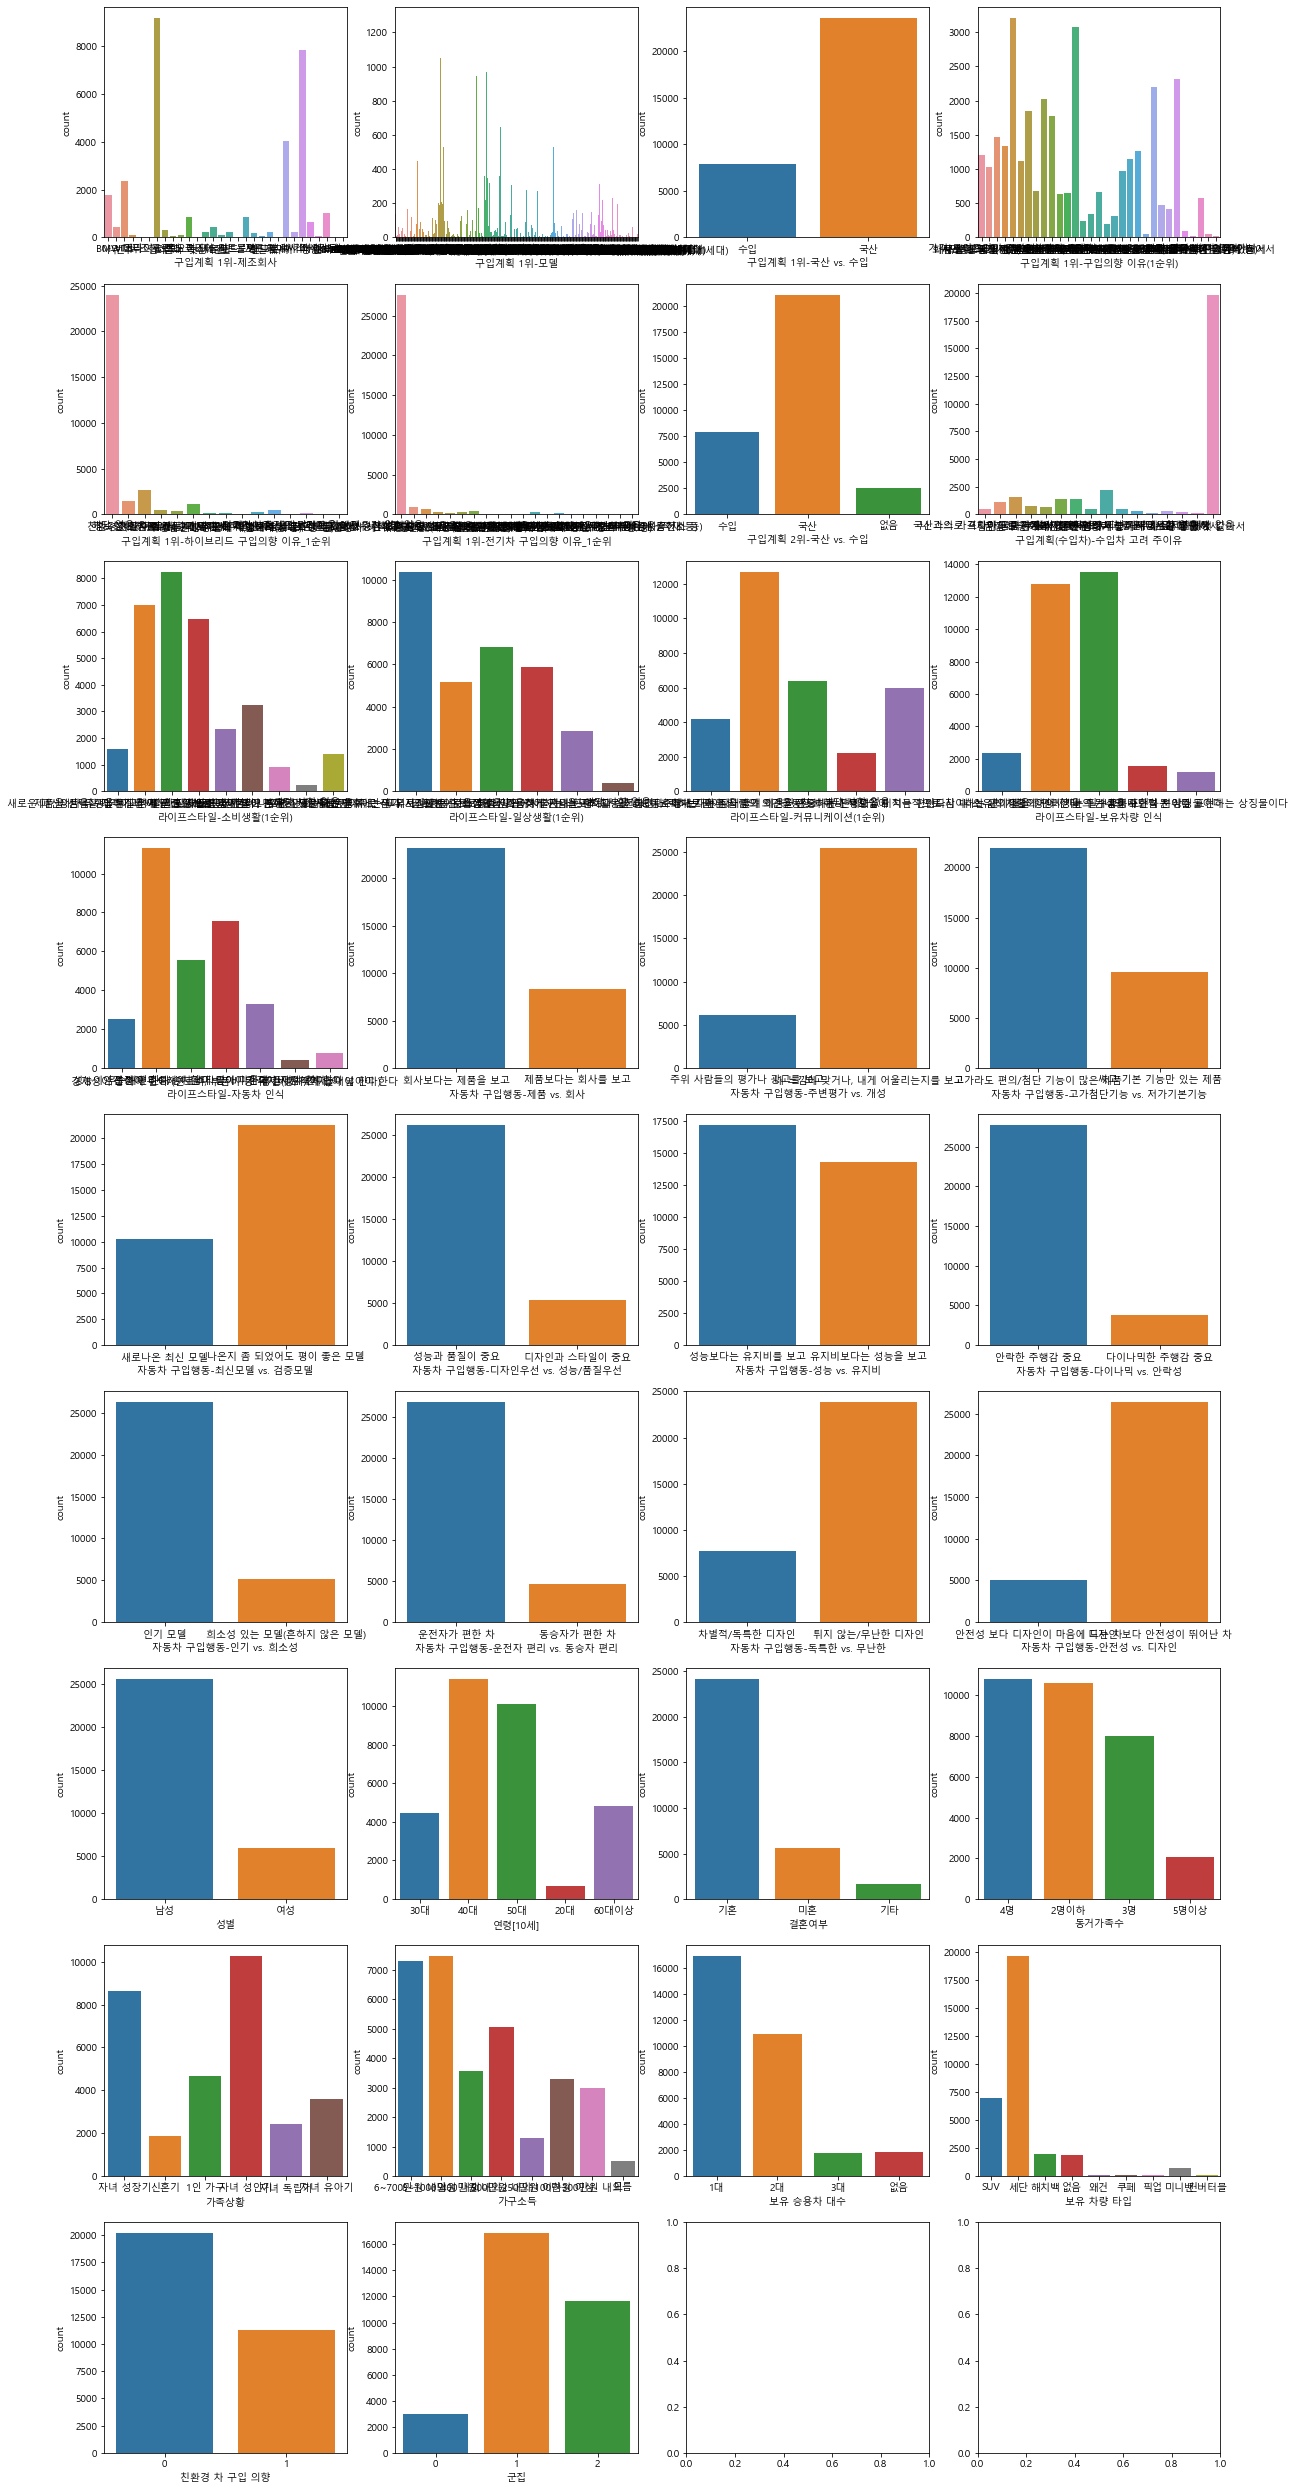

In [61]:
figure, axes = plt.subplots(figsize=(20, 45), nrows=9, ncols=4)

for i, col_name in enumerate(df_addcluster.columns):
    row = i // 4
    col = i % 4
    sns.countplot(data=df_addcluster, x=col_name, ax=axes[row][col])

### cramer's v

In [62]:
# cramer's v 검정 함수
from scipy.stats import chi2_contingency
   
def cramers_v_test(crstab):
    chi2=chi2_contingency(crstab)[0] 
    n=np.sum(crstab) 
    phi2=chi2/n
    r, k=crstab.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1) 
    kcorr = k - ((k-1)**2)/(n-1)
    cramers_result=np.sqrt(phi2corr / min((kcorr-1), (rcorr-1))) 
    return cramers_result

In [63]:
# 각 변수 조합별로 계수 산출
rows=[]
for i in range(len(df_addcluster.columns)):
    col=[]
    for j in range(0, len(df_addcluster.columns)):
        crstab=pd.crosstab(df_addcluster.iloc[:, i],df_addcluster.iloc[:, j])
        cramers_result1=cramers_v_test(crstab.values)
        col.append(round(cramers_result1, 2))
    rows.append(col)

In [64]:
cramers=np.array(rows)
df_cramers=pd.DataFrame(cramers, columns=df_addcluster.columns, index=df_addcluster.columns)
df_cramers

,구입계획 1위-제조회사,구입계획 1위-모델,구입계획 1위-국산 vs. 수입,구입계획 1위-구입의향 이유(1순위),구입계획 1위-하이브리드 구입의향 이유_1순위,구입계획 1위-전기차 구입의향 이유_1순위,구입계획 2위-국산 vs. 수입,구입계획(수입차)-수입차 고려 주이유,라이프스타일-소비생활(1순위),라이프스타일-일상생활(1순위),...,성별,연령[10세],결혼여부,동거가족수,가족상황,가구소득,보유 승용차 대수,보유 차량 타입,친환경 차 구입 의향,군집
구입계획 1위-제조회사,1.00,1.00,1.00,0.13,0.09,0.09,0.31,0.22,0.05,0.04,...,0.10,0.07,0.07,0.03,0.06,0.08,0.09,0.06,0.25,0.66
구입계획 1위-모델,1.00,1.00,0.99,0.25,0.21,0.22,0.34,0.27,0.06,0.06,...,0.23,0.12,0.16,0.08,0.10,0.11,0.15,0.13,0.59,0.99
구입계획 1위-국산 vs. 수입,1.00,0.99,1.00,0.32,0.04,0.04,0.37,0.76,0.09,0.05,...,0.05,0.10,0.03,0.02,0.09,0.14,0.11,0.09,0.00,0.64
구입계획 1위-구입의향 이유(1순위),0.13,0.25,0.32,1.00,0.08,0.11,0.12,0.10,0.03,0.02,...,0.07,0.04,0.06,0.03,0.04,0.04,0.05,0.04,0.34,0.24
구입계획 1위-하이브리드 구입의향 이유_1순위,0.09,0.21,0.04,0.08,1.00,0.05,0.03,0.04,0.01,0.01,...,0.05,0.00,0.01,0.00,0.00,0.01,0.02,0.00,0.75,0.12
구입계획 1위-전기차 구입의향 이유_1순위,0.09,0.22,0.04,0.11,0.05,1.00,0.05,0.04,0.01,0.00,...,0.02,0.02,0.02,0.01,0.01,0.01,0.02,0.02,0.50,0.23
구입계획 2위-국산 vs. 수입,0.31,0.34,0.37,0.12,0.03,0.05,1.00,0.54,0.07,0.05,...,0.07,0.07,0.03,0.02,0.06,0.09,0.06,0.05,0.02,0.27
구입계획(수입차)-수입차 고려 주이유,0.22,0.27,0.76,0.10,0.04,0.04,0.54,1.00,0.04,0.03,...,0.07,0.06,0.04,0.02,0.04,0.06,0.07,0.04,0.05,0.42
라이프스타일-소비생활(1순위),0.05,0.06,0.09,0.03,0.01,0.01,0.07,0.04,1.00,0.11,...,0.02,0.05,0.04,0.02,0.03,0.05,0.03,0.03,0.02,0.08
라이프스타일-일상생활(1순위),0.04,0.06,0.05,0.02,0.01,0.00,0.05,0.03,0.11,1.00,...,0.13,0.07,0.11,0.03,0.06,0.07,0.06,0.04,0.02,0.05


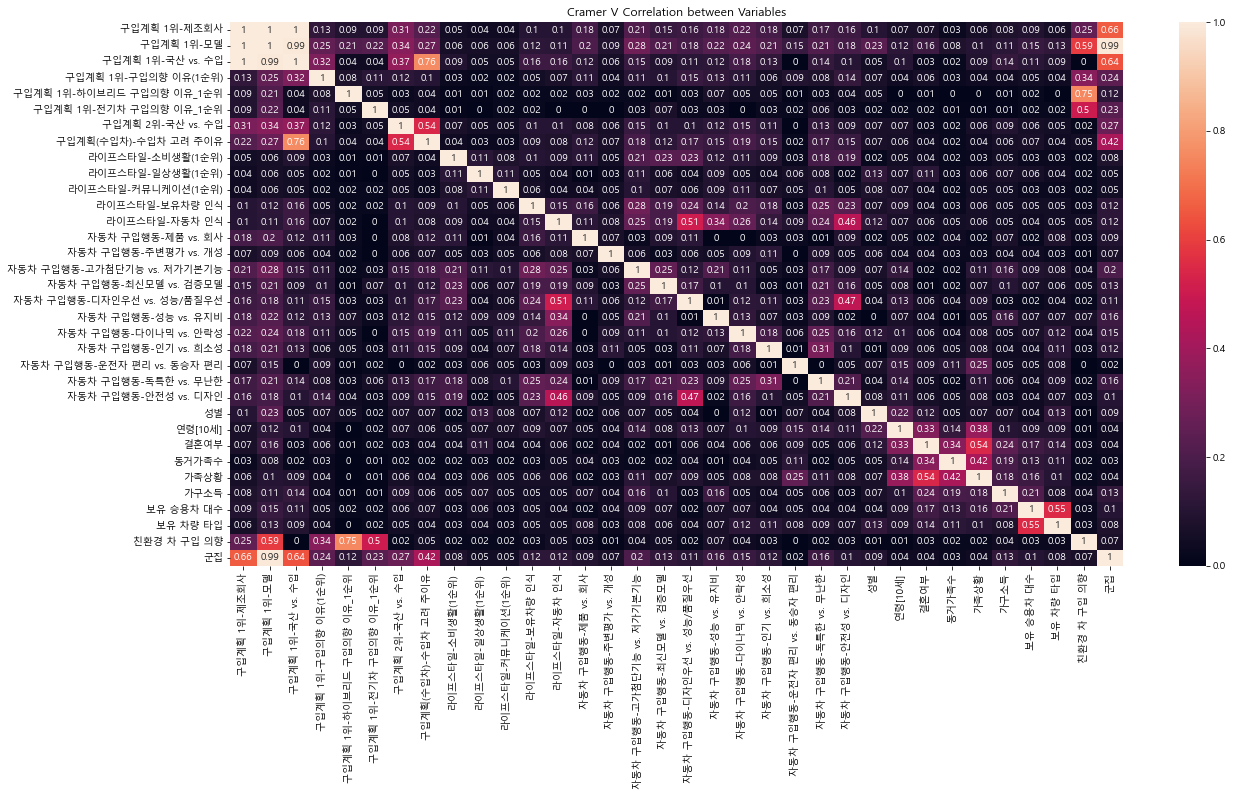

In [65]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.rcParams['font.family'] = 'Malgun Gothic'
ax = sns.heatmap(df_cramers, annot=True, ax=ax); ax.set_title("Cramer V Correlation between Variables");

## 추가 전처리

In [66]:
df_eda = df_addcluster.copy()

In [67]:
# 결혼여부에 따른 가족 상황
df_eda.groupby('결혼여부')['가족상황'].value_counts()

결혼여부  가족상황  
기타    1인 가구      781
      자녀 성인기     498
      자녀 성장기     269
      자녀 독립기     124
      자녀 유아기      29
      신혼기          2
기혼    자녀 성인기    8290
      자녀 성장기    8275
      자녀 유아기    3518
      자녀 독립기    2048
      신혼기       1869
      1인 가구      135
미혼    1인 가구     3744
      자녀 성인기    1476
      자녀 독립기     274
      자녀 성장기      84
      자녀 유아기      58
      신혼기          2
Name: 가족상황, dtype: int64

In [68]:
# 미혼인데 신혼기인 행 제외
df_eda.drop(df_eda[(df_eda['결혼여부'] == '미혼') & (df_eda['가족상황'] == '신혼기')].index, axis=0, inplace=True)
df_eda.groupby('결혼여부')['가족상황'].value_counts()

결혼여부  가족상황  
기타    1인 가구      781
      자녀 성인기     498
      자녀 성장기     269
      자녀 독립기     124
      자녀 유아기      29
      신혼기          2
기혼    자녀 성인기    8290
      자녀 성장기    8275
      자녀 유아기    3518
      자녀 독립기    2048
      신혼기       1869
      1인 가구      135
미혼    1인 가구     3744
      자녀 성인기    1476
      자녀 독립기     274
      자녀 성장기      84
      자녀 유아기      58
Name: 가족상황, dtype: int64

In [69]:
# 가족상황에 따른 동거가족수
df_eda.groupby('가족상황')['동거가족수'].value_counts()

가족상황    동거가족수
1인 가구   2명이하     4559
        3명         65
        4명         36
신혼기     2명이하     1558
        3명        170
        4명        128
        5명이상       15
자녀 독립기  2명이하     1600
        3명        523
        4명        254
        5명이상       69
자녀 성인기  4명       4367
        3명       3312
        2명이하     1935
        5명이상      650
자녀 성장기  4명       4497
        3명       2476
        5명이상      973
        2명이하      682
자녀 유아기  4명       1511
        3명       1441
        5명이상      360
        2명이하      293
Name: 동거가족수, dtype: int64

In [70]:
# 동거가족수가 3인 이상인데 1인가구인 행 제외
df_eda.drop(df_eda[(df_eda['가족상황'] == '1인 가구') & (df_eda['동거가족수'] != '2명이하')].index, axis=0, inplace=True)
df_eda.groupby('가족상황')['동거가족수'].value_counts()

가족상황    동거가족수
1인 가구   2명이하     4559
신혼기     2명이하     1558
        3명        170
        4명        128
        5명이상       15
자녀 독립기  2명이하     1600
        3명        523
        4명        254
        5명이상       69
자녀 성인기  4명       4367
        3명       3312
        2명이하     1935
        5명이상      650
자녀 성장기  4명       4497
        3명       2476
        5명이상      973
        2명이하      682
자녀 유아기  4명       1511
        3명       1441
        5명이상      360
        2명이하      293
Name: 동거가족수, dtype: int64

In [71]:
# 보유 승용차 대수에 따른 보유 차량 타입
df_eda.groupby('보유 승용차 대수')['보유 차량 타입'].value_counts()

보유 승용차 대수  보유 차량 타입
1대         세단          11452
           SUV          3878
           해치백          1014
           미니밴           350
           없음             63
           왜건             42
           쿠페             37
           픽업             31
           컨버터블            9
2대         세단           6905
           SUV          2669
           해치백           817
           미니밴           363
           픽업             40
           컨버터블           34
           쿠페             29
           없음             28
           왜건             19
3대         세단           1177
           SUV           411
           해치백           117
           미니밴            28
           쿠페             13
           없음              8
           왜건              8
           컨버터블            6
           픽업              3
없음         없음           1730
           세단             63
           SUV            23
           해치백             6
Name: 보유 차량 타입, dtype: int64

In [72]:
# 보유 승용차 대수가 없음인데 보유 차량 타입 값이 없음이 아닌 행 제거
df_eda.drop(df_eda[(df_eda['보유 승용차 대수'] == '없음') & (df_eda['보유 차량 타입'] != '없음')].index, axis=0, inplace=True)
df_eda.groupby('보유 승용차 대수')['보유 차량 타입'].value_counts()

보유 승용차 대수  보유 차량 타입
1대         세단          11452
           SUV          3878
           해치백          1014
           미니밴           350
           없음             63
           왜건             42
           쿠페             37
           픽업             31
           컨버터블            9
2대         세단           6905
           SUV          2669
           해치백           817
           미니밴           363
           픽업             40
           컨버터블           34
           쿠페             29
           없음             28
           왜건             19
3대         세단           1177
           SUV           411
           해치백           117
           미니밴            28
           쿠페             13
           없음              8
           왜건              8
           컨버터블            6
           픽업              3
없음         없음           1730
Name: 보유 차량 타입, dtype: int64

In [73]:
# 보유 승용차가 있는데 보유 차량 타입 값이 없음인 행 제거
df_eda.drop(df_eda[(df_eda['보유 승용차 대수'] != '없음') & (df_eda['보유 차량 타입'] == '없음')].index, axis=0, inplace=True)
df_eda.groupby('보유 승용차 대수')['보유 차량 타입'].value_counts()

보유 승용차 대수  보유 차량 타입
1대         세단          11452
           SUV          3878
           해치백          1014
           미니밴           350
           왜건             42
           쿠페             37
           픽업             31
           컨버터블            9
2대         세단           6905
           SUV          2669
           해치백           817
           미니밴           363
           픽업             40
           컨버터블           34
           쿠페             29
           왜건             19
3대         세단           1177
           SUV           411
           해치백           117
           미니밴            28
           쿠페             13
           왜건              8
           컨버터블            6
           픽업              3
없음         없음           1730
Name: 보유 차량 타입, dtype: int64

In [74]:
# 구입의향 이유 범주 개수 줄이기
df_eda['구입계획 1위-구입의향 이유(1순위)'].value_counts()

외관스타일이 마음에 들어서          3174
안전성이 좋을 것 같아서           3047
차량 활용성이 높아서(캠핑/차박 등)    2284
친환경 차량이어서               2194
연비가 좋아서                 2010
모델의 명성/평판이 좋아서          1828
승차공간이 여유로워서             1759
회사/브랜드가 마음에 들어서         1461
품질이 좋아서(잔고장 적음)         1334
연료타입이 마음에 들어서           1248
가격/구입조건이 좋아서            1199
신모델/최신모델이어서             1143
써보니 그 회사/브랜드 차가 좋아서     1109
내구성이 좋을 것 같아서           1018
첨단/편의사양이 좋아서             970
크기(전장)가 마음에 들어서          671
트렁크/적재함 이용이 편리해서         659
엔진 배기량/힘이 좋아서            639
승차감이 좋아서                 634
세제/세금 혜택이 좋아서            575
정숙성이 좋아서(소음/잡음 없음)       481
A/S가 좋아서                 410
실내 인테리어가 마음에 들어서         337
중고차 가격이 좋을 것 같아서         311
기타                       245
기본 장착 사양이 많아서            192
회사/영업사원과 연고관계가 있어서        94
차량인수 기간이 짧아서              55
광고/PR이 좋아서                51
칼라가 마음에 들어서               27
영업사원이 마음에 들어서             23
Name: 구입계획 1위-구입의향 이유(1순위), dtype: int64

In [75]:
df_eda['구입계획 1위-구입의향 이유(1순위)'].unique()

array(['가격/구입조건이 좋아서', '내구성이 좋을 것 같아서', '회사/브랜드가 마음에 들어서',
       '품질이 좋아서(잔고장 적음)', '외관스타일이 마음에 들어서', '써보니 그 회사/브랜드 차가 좋아서',
       '모델의 명성/평판이 좋아서', '크기(전장)가 마음에 들어서', '연비가 좋아서', '승차공간이 여유로워서',
       '승차감이 좋아서', '엔진 배기량/힘이 좋아서', '안전성이 좋을 것 같아서', '기타',
       '실내 인테리어가 마음에 들어서', '트렁크/적재함 이용이 편리해서', '기본 장착 사양이 많아서',
       '중고차 가격이 좋을 것 같아서', '첨단/편의사양이 좋아서', '신모델/최신모델이어서', '연료타입이 마음에 들어서',
       '차량인수 기간이 짧아서', '친환경 차량이어서', '정숙성이 좋아서(소음/잡음 없음)', 'A/S가 좋아서',
       '차량 활용성이 높아서(캠핑/차박 등)', '회사/영업사원과 연고관계가 있어서', '칼라가 마음에 들어서',
       '세제/세금 혜택이 좋아서', '광고/PR이 좋아서', '영업사원이 마음에 들어서'], dtype=object)

In [76]:
dict1 = {
    '가격/구입조건이 좋아서': '합리성', 
    '내구성이 좋을 것 같아서': '품질', 
    '회사/브랜드가 마음에 들어서': '브랜드',
    '품질이 좋아서(잔고장 적음)': '품질', 
    '외관스타일이 마음에 들어서': '디자인', 
    '써보니 그 회사/브랜드 차가 좋아서': '브랜드',
    '모델의 명성/평판이 좋아서': '모델 명성', 
    '크기(전장)가 마음에 들어서': '디자인',
    '연비가 좋아서': '성능', 
    '승차공간이 여유로워서': '디자인',
    '승차감이 좋아서': '품질', 
    '엔진 배기량/힘이 좋아서': '성능', 
    '안전성이 좋을 것 같아서': '품질', 
    '기타': '기타',
    '실내 인테리어가 마음에 들어서': '디자인', 
    '트렁크/적재함 이용이 편리해서': '디자인', 
    '기본 장착 사양이 많아서': '합리성',
    '중고차 가격이 좋을 것 같아서': '합리성', 
    '첨단/편의사양이 좋아서': '성능',
    '신모델/최신모델이어서': '최신', 
    '연료타입이 마음에 들어서': '성능',
    '차량인수 기간이 짧아서': '서비스', 
    '친환경 차량이어서': '친환경', 
    '정숙성이 좋아서(소음/잡음 없음)': '성능', 
    'A/S가 좋아서': '서비스',
    '차량 활용성이 높아서(캠핑/차박 등)': '활용성', 
    '회사/영업사원과 연고관계가 있어서': '영업', 
    '칼라가 마음에 들어서': '디자인',
    '세제/세금 혜택이 좋아서': '혜택', 
    '광고/PR이 좋아서': '영업', 
    '영업사원이 마음에 들어서': '영업'
}

In [77]:
df_eda['구입계획 1위-구입의향 이유(1순위)'].replace(dict1.keys(), dict1.values(), inplace=True)
df_eda['구입계획 1위-구입의향 이유(1순위)'].value_counts()

디자인      6627
품질       6033
성능       5348
브랜드      2570
활용성      2284
친환경      2194
모델 명성    1828
합리성      1702
최신       1143
혜택        575
서비스       465
기타        245
영업        168
Name: 구입계획 1위-구입의향 이유(1순위), dtype: int64

In [78]:
df_eda['구입계획 1위-구입의향 이유(1순위)'].replace(['영업', '서비스'], '기타', inplace=True)
df_eda['구입계획 1위-구입의향 이유(1순위)'].value_counts()

디자인      6627
품질       6033
성능       5348
브랜드      2570
활용성      2284
친환경      2194
모델 명성    1828
합리성      1702
최신       1143
기타        878
혜택        575
Name: 구입계획 1위-구입의향 이유(1순위), dtype: int64

In [79]:
# 보유 차량 타입 100개 미만은 '기타'
df_eda['보유 차량 타입'].value_counts()

세단      19534
SUV      6958
해치백      1948
없음       1730
미니밴       741
쿠페         79
픽업         74
왜건         69
컨버터블       49
Name: 보유 차량 타입, dtype: int64

In [80]:
df_eda['보유 차량 타입'].replace(['쿠페', '왜건', '픽업', '컨버터블'], '기타', inplace=True)
df_eda['보유 차량 타입'].value_counts()

세단     19534
SUV     6958
해치백     1948
없음      1730
미니밴      741
기타       271
Name: 보유 차량 타입, dtype: int64

In [81]:
# 가구소득 모름 drop
df_eda.drop(df_eda[df_eda['가구소득'] == '모름'].index, axis=0, inplace=True)
df_eda['가구소득'].value_counts()

8~1000만원 내외    7429
6~700만원 내외     7272
500만원 내외       5025
400만원 내외       3511
1100만원 이상      3270
300만원 내외       2939
250만원 이하       1248
Name: 가구소득, dtype: int64

## 학습

### 분류에 사용할 데이터

In [82]:
df_eda.columns

Index(['구입계획 1위-제조회사', '구입계획 1위-모델', '구입계획 1위-국산 vs. 수입',
       '구입계획 1위-구입의향 이유(1순위)', '구입계획 1위-하이브리드 구입의향 이유_1순위',
       '구입계획 1위-전기차 구입의향 이유_1순위', '구입계획 2위-국산 vs. 수입', '구입계획(수입차)-수입차 고려 주이유',
       '라이프스타일-소비생활(1순위)', '라이프스타일-일상생활(1순위)', '라이프스타일-커뮤니케이션(1순위)',
       '라이프스타일-보유차량 인식', '라이프스타일-자동차 인식', '자동차 구입행동-제품 vs. 회사',
       '자동차 구입행동-주변평가 vs. 개성', '자동차 구입행동-고가첨단기능 vs. 저가기본기능',
       '자동차 구입행동-최신모델 vs. 검증모델', '자동차 구입행동-디자인우선 vs. 성능/품질우선',
       '자동차 구입행동-성능 vs. 유지비', '자동차 구입행동-다이나믹 vs. 안락성', '자동차 구입행동-인기 vs. 희소성',
       '자동차 구입행동-운전자 편리 vs. 동승자 편리', '자동차 구입행동-독특한 vs. 무난한',
       '자동차 구입행동-안전성 vs. 디자인', '성별', '연령[10세]', '결혼여부', '동거가족수', '가족상황',
       '가구소득', '보유 승용차 대수', '보유 차량 타입', '친환경 차 구입 의향', '군집'],
      dtype='object')

In [83]:
# 분류에 쓸 데이터
df_clf = df_eda.loc[df_eda['구입계획 1위-국산 vs. 수입'] == '국산', ['구입계획 1위-구입의향 이유(1순위)', 
                              '라이프스타일-소비생활(1순위)', '라이프스타일-일상생활(1순위)', '라이프스타일-커뮤니케이션(1순위)', 
                              '라이프스타일-보유차량 인식', '라이프스타일-자동차 인식', '자동차 구입행동-제품 vs. 회사',
                              '자동차 구입행동-주변평가 vs. 개성', '자동차 구입행동-고가첨단기능 vs. 저가기본기능',
                              '자동차 구입행동-최신모델 vs. 검증모델', '자동차 구입행동-디자인우선 vs. 성능/품질우선',
                              '자동차 구입행동-성능 vs. 유지비', '자동차 구입행동-다이나믹 vs. 안락성', '자동차 구입행동-인기 vs. 희소성',
                              '자동차 구입행동-운전자 편리 vs. 동승자 편리', '자동차 구입행동-독특한 vs. 무난한',
                              '자동차 구입행동-안전성 vs. 디자인', '성별', '연령[10세]', '결혼여부', '동거가족수', '가족상황',
                              '가구소득', '보유 승용차 대수', '보유 차량 타입', '친환경 차 구입 의향', '군집']]
df_clf

,구입계획 1위-구입의향 이유(1순위),라이프스타일-소비생활(1순위),라이프스타일-일상생활(1순위),라이프스타일-커뮤니케이션(1순위),라이프스타일-보유차량 인식,라이프스타일-자동차 인식,자동차 구입행동-제품 vs. 회사,자동차 구입행동-주변평가 vs. 개성,자동차 구입행동-고가첨단기능 vs. 저가기본기능,자동차 구입행동-최신모델 vs. 검증모델,...,성별,연령[10세],결혼여부,동거가족수,가족상황,가구소득,보유 승용차 대수,보유 차량 타입,친환경 차 구입 의향,군집
716,모델 명성,제품을 선택할 때 품질을 제일 중요하게 고려한다,"주말, 연휴에는 교외로 나가는 것을 좋아한다",동창회 등 친목모임에 적극적으로 참여하는 편이다,생활의 편리성을 주는 교통수단일 뿐이다,안전성이 우수해야 한다,제품보다는 회사를 보고,"내 느낌에 맞거나, 내게 어울리는지를 보고",싸고 기본 기능만 있는 제품,나온지 좀 되었어도 평이 좋은 모델,...,남성,40대,기혼,3명,자녀 유아기,500만원 내외,2대,세단,0,1
717,합리성,디자인이 좋지 않으면 사지 않는다,"주말, 연휴에는 교외로 나가는 것을 좋아한다",동창회 등 친목모임에 적극적으로 참여하는 편이다,반드시 내 소유의 차량이어야 한다,"경제성이 좋아야 한다 (연료비, 부품비 등 유지비가 적게 들어야 한다)",회사보다는 제품을 보고,"내 느낌에 맞거나, 내게 어울리는지를 보고",싸고 기본 기능만 있는 제품,나온지 좀 되었어도 평이 좋은 모델,...,남성,60대이상,기혼,3명,자녀 성인기,300만원 내외,1대,세단,0,1
718,최신,제품을 선택할 때 품질을 제일 중요하게 고려한다,웰빙이나 로하스 같은 것에 관심을 가지고 실천하려 노력하는 편이다,대체로 다른 사람의 의견을 선도하거나 영향을 미치는 편이다,나의 삶의 질을 향상시키는 필수품이다,스타일이 마음에 들어야 한다,회사보다는 제품을 보고,주위 사람들의 평가나 광고를 보고,고가라도 편의/첨단 기능이 많은 제품,나온지 좀 되었어도 평이 좋은 모델,...,남성,40대,기혼,4명,자녀 유아기,400만원 내외,1대,세단,0,1
719,성능,제품을 선택할 때 품질을 제일 중요하게 고려한다,여가 시간에는 주로 집에서 조용하게 지내는 편이다,내 주장 보다는 상대방의 의견을 존중하는 편이다,생활의 편리성을 주는 교통수단일 뿐이다,"경제성이 좋아야 한다 (연료비, 부품비 등 유지비가 적게 들어야 한다)",회사보다는 제품을 보고,"내 느낌에 맞거나, 내게 어울리는지를 보고",고가라도 편의/첨단 기능이 많은 제품,나온지 좀 되었어도 평이 좋은 모델,...,남성,40대,미혼,3명,자녀 성인기,300만원 내외,2대,세단,0,1
720,품질,디자인이 좋지 않으면 사지 않는다,"주말, 연휴에는 교외로 나가는 것을 좋아한다",대체로 다른 사람의 의견을 선도하거나 영향을 미치는 편이다,생활의 편리성을 주는 교통수단일 뿐이다,"경제성이 좋아야 한다 (연료비, 부품비 등 유지비가 적게 들어야 한다)",회사보다는 제품을 보고,"내 느낌에 맞거나, 내게 어울리는지를 보고",고가라도 편의/첨단 기능이 많은 제품,나온지 좀 되었어도 평이 좋은 모델,...,여성,60대이상,기타,2명이하,1인 가구,500만원 내외,1대,해치백,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37927,성능,제품을 선택할 때 품질을 제일 중요하게 고려한다,여가 시간에는 주로 집에서 조용하게 지내는 편이다,내 주장 보다는 상대방의 의견을 존중하는 편이다,생활의 편리성을 주는 교통수단일 뿐이다,"경제성이 좋아야 한다 (연료비, 부품비 등 유지비가 적게 들어야 한다)",회사보다는 제품을 보고,"내 느낌에 맞거나, 내게 어울리는지를 보고",고가라도 편의/첨단 기능이 많은 제품,나온지 좀 되었어도 평이 좋은 모델,...,남성,30대,미혼,2명이하,1인 가구,250만원 이하,없음,없음,0,1
37928,성능,유명 상표의 제품을 주로 산다,"골프, 등산, 스키 등 야외에서 하는 스포츠 활동을 즐긴다",인터넷 동호회나 카페 등을 즐겨 이용한다,반드시 내 소유의 차량이어야 한다,안전성이 우수해야 한다,제품보다는 회사를 보고,주위 사람들의 평가나 광고를 보고,싸고 기본 기능만 있는 제품,나온지 좀 되었어도 평이 좋은 모델,...,남성,40대,기혼,4명,자녀 유아기,1100만원 이상,1대,세단,0,1
37929,합리성,꼭 필요한 물건만 산다,"나는 영화, 연극, 뮤지컬 등의 문화생활을 가급적 즐기려 한다",해당 사항 없음,나의 삶의 질을 향상시키는 필수품이다,스타일이 마음에 들어야 한다,회사보다는 제품을 보고,"내 느낌에 맞거나, 내게 어울리는지를 보고",고가라도 편의/첨단 기능이 많은 제품,나온지 좀 되었어도 평이 좋은 모델,...,남성,30대,미혼,2명이하,1인 가구,500만원 내외,없음,없음,0,1
37930,성능,상품을 구입하기 전에 관련 정보를 많이 알아 본다,여가 시간에는 주로 집에서 조용하게 지내는 편이다,해당 사항 없음,생활의 편리성을 주는 교통수단일 뿐이다,성능이 우수해야 한다,회사보다는 제품을 보고,"내 느낌에 맞거나, 내게 어울리는지를 보고",고가라도 편의/첨단 기능이 많은 제품,나온지 좀 되었어도 평이 좋은 모델,...,여성,40대,기혼,5명이상,자녀 성장기,6~700만원 내외,없음,없음,0,1


In [84]:
df_clf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23043 entries, 716 to 37931
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   구입계획 1위-구입의향 이유(1순위)        23043 non-null  object
 1   라이프스타일-소비생활(1순위)            23043 non-null  object
 2   라이프스타일-일상생활(1순위)            23043 non-null  object
 3   라이프스타일-커뮤니케이션(1순위)          23043 non-null  object
 4   라이프스타일-보유차량 인식              23043 non-null  object
 5   라이프스타일-자동차 인식               23043 non-null  object
 6   자동차 구입행동-제품 vs. 회사          23043 non-null  object
 7   자동차 구입행동-주변평가 vs. 개성        23043 non-null  object
 8   자동차 구입행동-고가첨단기능 vs. 저가기본기능  23043 non-null  object
 9   자동차 구입행동-최신모델 vs. 검증모델      23043 non-null  object
 10  자동차 구입행동-디자인우선 vs. 성능/품질우선  23043 non-null  object
 11  자동차 구입행동-성능 vs. 유지비         23043 non-null  object
 12  자동차 구입행동-다이나믹 vs. 안락성       23043 non-null  object
 13  자동차 구입행동-인기 vs. 희소성         23043 non-null  

In [85]:
rows=[]
for i in range(len(df_clf.columns)):
    col=[]
    for j in range(0, len(df_clf.columns)):
        crstab=pd.crosstab(df_clf.iloc[:, i],df_clf.iloc[:, j])
        cramers_result1=cramers_v_test(crstab.values)
        col.append(round(cramers_result1, 2))
    rows.append(col)

In [86]:
cramers=np.array(rows)
df_cramers=pd.DataFrame(cramers, columns=df_clf.columns, index=df_clf.columns)
df_cramers

,구입계획 1위-구입의향 이유(1순위),라이프스타일-소비생활(1순위),라이프스타일-일상생활(1순위),라이프스타일-커뮤니케이션(1순위),라이프스타일-보유차량 인식,라이프스타일-자동차 인식,자동차 구입행동-제품 vs. 회사,자동차 구입행동-주변평가 vs. 개성,자동차 구입행동-고가첨단기능 vs. 저가기본기능,자동차 구입행동-최신모델 vs. 검증모델,...,성별,연령[10세],결혼여부,동거가족수,가족상황,가구소득,보유 승용차 대수,보유 차량 타입,친환경 차 구입 의향,군집
구입계획 1위-구입의향 이유(1순위),1.00,0.02,0.01,0.02,0.02,0.03,0.06,0.02,0.07,0.08,...,0.06,0.04,0.04,0.02,0.04,0.03,0.04,0.04,0.33,0.18
라이프스타일-소비생활(1순위),0.02,1.00,0.11,0.08,0.09,0.08,0.10,0.05,0.21,0.22,...,0.02,0.05,0.04,0.02,0.03,0.05,0.03,0.02,0.02,0.06
라이프스타일-일상생활(1순위),0.01,0.11,1.00,0.11,0.05,0.03,0.01,0.03,0.11,0.06,...,0.14,0.07,0.11,0.03,0.06,0.07,0.05,0.03,0.02,0.05
라이프스타일-커뮤니케이션(1순위),0.02,0.08,0.11,1.00,0.05,0.04,0.02,0.05,0.10,0.06,...,0.09,0.07,0.05,0.02,0.05,0.05,0.04,0.03,0.02,0.04
라이프스타일-보유차량 인식,0.02,0.09,0.05,0.05,1.00,0.14,0.13,0.05,0.27,0.19,...,0.07,0.08,0.04,0.03,0.05,0.05,0.05,0.04,0.03,0.07
라이프스타일-자동차 인식,0.03,0.08,0.03,0.04,0.14,1.00,0.07,0.07,0.25,0.19,...,0.13,0.07,0.06,0.05,0.05,0.05,0.04,0.04,0.04,0.07
자동차 구입행동-제품 vs. 회사,0.06,0.10,0.01,0.02,0.13,0.07,1.00,0.08,0.00,0.06,...,0.03,0.05,0.01,0.04,0.02,0.05,0.01,0.08,0.02,0.01
자동차 구입행동-주변평가 vs. 개성,0.02,0.05,0.03,0.05,0.05,0.07,0.08,1.00,0.05,0.03,...,0.06,0.03,0.04,0.02,0.03,0.04,0.03,0.03,0.00,0.05
자동차 구입행동-고가첨단기능 vs. 저가기본기능,0.07,0.21,0.11,0.10,0.27,0.25,0.00,0.05,1.00,0.25,...,0.07,0.13,0.02,0.03,0.10,0.15,0.08,0.08,0.05,0.13
자동차 구입행동-최신모델 vs. 검증모델,0.08,0.22,0.06,0.06,0.19,0.19,0.06,0.03,0.25,1.00,...,0.04,0.07,0.02,0.02,0.06,0.10,0.07,0.07,0.06,0.10


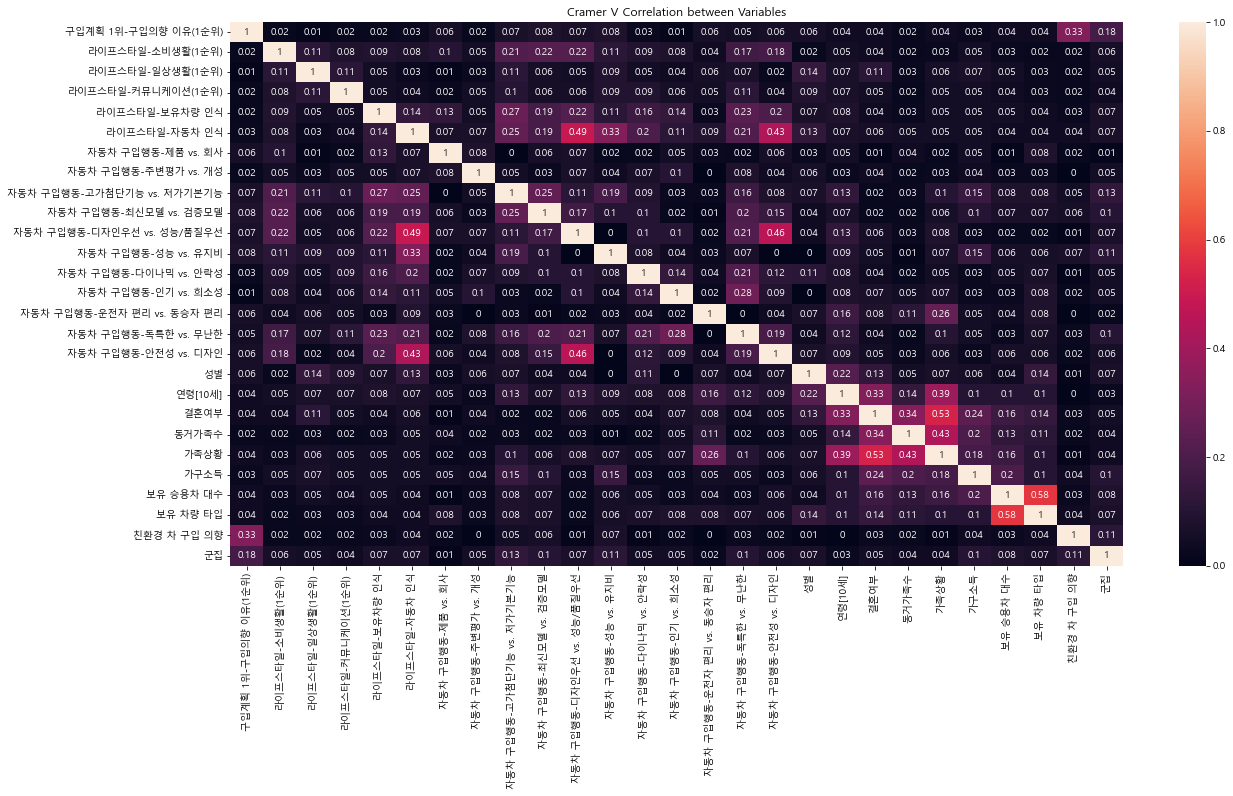

In [87]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.rcParams['font.family'] = 'Malgun Gothic'
ax = sns.heatmap(df_cramers, annot=True, ax=ax); ax.set_title("Cramer V Correlation between Variables");

In [88]:
df_clf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23043 entries, 716 to 37931
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   구입계획 1위-구입의향 이유(1순위)        23043 non-null  object
 1   라이프스타일-소비생활(1순위)            23043 non-null  object
 2   라이프스타일-일상생활(1순위)            23043 non-null  object
 3   라이프스타일-커뮤니케이션(1순위)          23043 non-null  object
 4   라이프스타일-보유차량 인식              23043 non-null  object
 5   라이프스타일-자동차 인식               23043 non-null  object
 6   자동차 구입행동-제품 vs. 회사          23043 non-null  object
 7   자동차 구입행동-주변평가 vs. 개성        23043 non-null  object
 8   자동차 구입행동-고가첨단기능 vs. 저가기본기능  23043 non-null  object
 9   자동차 구입행동-최신모델 vs. 검증모델      23043 non-null  object
 10  자동차 구입행동-디자인우선 vs. 성능/품질우선  23043 non-null  object
 11  자동차 구입행동-성능 vs. 유지비         23043 non-null  object
 12  자동차 구입행동-다이나믹 vs. 안락성       23043 non-null  object
 13  자동차 구입행동-인기 vs. 희소성         23043 non-null  

In [89]:
df_clf.groupby('군집').describe(include='object').T[:30]

군집                                                     0  \
구입계획 1위-구입의향 이유(1순위) count                           268   
                     unique                           10   
                     top                              품질   
                     freq                             84   
라이프스타일-소비생활(1순위)     count                           268   
                     unique                            9   
                     top     상품을 구입하기 전에 관련 정보를 많이 알아 본다   
                     freq                             76   
라이프스타일-일상생활(1순위)     count                           268   
                     unique                            5   
                     top        주말, 연휴에는 교외로 나가는 것을 좋아한다   
                     freq                             96   
라이프스타일-커뮤니케이션(1순위)   count                           268   
                     unique                            5   
                     top      내 주장 보다는 상대방의 의견을 존중하는 편이다   
                     freq                             90   
라이프스타일-보유차량 인식       count                           268   
                     unique                            5   
                     top            나의 삶의 질을 향상시키는 필수품이다   
                     freq                            114   
라이프스타일-자동차 인식        count                           268   
                     unique                            7   
                     top                    안전성이 우수해야 한다   
                     freq                            100   
자동차 구입행동-제품 vs. 회사   count                           268   
                     unique                            2   
                     top                    회사보다는 제품을 보고   
                     freq                            206   
자동차 구입행동-주변평가 vs. 개성 count                           268   
                     unique                            2   

군집                                                     1  \
구입계획 1위-구입의향 이유(1순위) count                         16047   
                     unique                           11   
                     top                             디자인   
                     freq                           3772   
라이프스타일-소비생활(1순위)     count                         16047   
                     unique                            9   
                     top     상품을 구입하기 전에 관련 정보를 많이 알아 본다   
                     freq                           4392   
라이프스타일-일상생활(1순위)     count                         16047   
                     unique                            6   
                     top        주말, 연휴에는 교외로 나가는 것을 좋아한다   
                     freq                           5282   
라이프스타일-커뮤니케이션(1순위)   count                         16047   
                     unique                            5   
                     top      내 주장 보다는 상대방의 의견을 존중하는 편이다   
                     freq                           6909   
라이프스타일-보유차량 인식       count                         16047   
                     unique                            5   
                     top           생활의 편리성을 주는 교통수단일 뿐이다   
                     freq                           8089   
라이프스타일-자동차 인식        count                         16047   
                     unique                            7   
                     top                    안전성이 우수해야 한다   
                     freq                           5752   
자동차 구입행동-제품 vs. 회사   count                         16047   
                     unique                            2   
                     top                    회사보다는 제품을 보고   
                     freq                          12381   
자동차 구입행동-주변평가 vs. 개성 count                         16047   
                     unique                            2   

군집                                                     2  
구입계획 1위-구입의향 이유(1순위) count                          6728  
                     unique                           11  
                     top                              성능  
                     freq                 

### 범주형 변수 encoding

In [91]:
# 레이블 인코딩
from sklearn.preprocessing import LabelEncoder
df_clf_encoded = []

for col in df_clf.columns:
    le = LabelEncoder()
    le.fit(df_clf.loc[:, col])
    result = le.transform(df_clf.loc[:, col])
    df_clf_encoded.append(result)
    
df_clf_encoded = pd.DataFrame(df_clf_encoded).T
df_clf_encoded.columns = df_clf.columns
df_clf_encoded

,구입계획 1위-구입의향 이유(1순위),라이프스타일-소비생활(1순위),라이프스타일-일상생활(1순위),라이프스타일-커뮤니케이션(1순위),라이프스타일-보유차량 인식,라이프스타일-자동차 인식,자동차 구입행동-제품 vs. 회사,자동차 구입행동-주변평가 vs. 개성,자동차 구입행동-고가첨단기능 vs. 저가기본기능,자동차 구입행동-최신모델 vs. 검증모델,...,성별,연령[10세],결혼여부,동거가족수,가족상황,가구소득,보유 승용차 대수,보유 차량 타입,친환경 차 구입 의향,군집
0,2,7,4,2,4,5,0,0,1,0,...,0,2,1,1,5,4,1,3,0,1
1,8,2,4,2,3,1,1,0,1,0,...,0,4,1,1,3,2,0,3,0,1
2,5,7,3,1,2,4,1,1,0,0,...,0,2,1,2,5,3,0,3,0,1
3,4,7,2,0,4,1,1,0,0,0,...,0,2,2,1,3,2,1,3,0,1
4,7,2,4,1,4,1,1,0,0,0,...,1,4,0,0,0,4,0,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23038,4,7,2,0,4,1,1,0,0,0,...,0,1,2,0,0,1,3,4,0,1
23039,4,6,0,3,3,5,0,1,1,0,...,0,2,1,2,5,0,0,3,0,1
23040,8,1,1,4,2,4,1,0,0,0,...,0,1,2,0,0,4,3,4,0,1
23041,4,3,2,4,4,3,1,0,0,0,...,1,2,1,3,4,5,3,4,0,1


### 데이터셋 split

In [92]:
df_clf_encoded.rename(columns={'연령[10세]': '연령'}, inplace=True)
df_clf_encoded.columns

Index(['구입계획 1위-구입의향 이유(1순위)', '라이프스타일-소비생활(1순위)', '라이프스타일-일상생활(1순위)',
       '라이프스타일-커뮤니케이션(1순위)', '라이프스타일-보유차량 인식', '라이프스타일-자동차 인식',
       '자동차 구입행동-제품 vs. 회사', '자동차 구입행동-주변평가 vs. 개성',
       '자동차 구입행동-고가첨단기능 vs. 저가기본기능', '자동차 구입행동-최신모델 vs. 검증모델',
       '자동차 구입행동-디자인우선 vs. 성능/품질우선', '자동차 구입행동-성능 vs. 유지비',
       '자동차 구입행동-다이나믹 vs. 안락성', '자동차 구입행동-인기 vs. 희소성',
       '자동차 구입행동-운전자 편리 vs. 동승자 편리', '자동차 구입행동-독특한 vs. 무난한',
       '자동차 구입행동-안전성 vs. 디자인', '성별', '연령', '결혼여부', '동거가족수', '가족상황', '가구소득',
       '보유 승용차 대수', '보유 차량 타입', '친환경 차 구입 의향', '군집'],
      dtype='object')

In [93]:
df_clf_encoded['군집'].value_counts()

1    16047
2     6728
0      268
Name: 군집, dtype: int64

In [94]:
X = df_clf_encoded.drop(['군집'], axis=1)
y = df_clf_encoded['군집']
X.shape, y.shape

((23043, 26), (23043,))

In [95]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16130, 26), (6913, 26), (16130,), (6913,))

In [96]:
y_train.value_counts()

1    11237
2     4704
0      189
Name: 군집, dtype: int64

In [97]:
y_test.value_counts()

1    4810
2    2024
0      79
Name: 군집, dtype: int64

### 여러가지 모델

In [1288]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)
print(dt.__class__.__name__)
print('train accuracy:', dt.score(X_train, y_train))
print('test accuracy:', dt.score(X_test, y_test))

DecisionTreeClassifier
train accuracy: 0.9897706137631742
test accuracy: 0.5994503110082453


In [1289]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(X_train, y_train)
print(rf.__class__.__name__)
print('train accuracy:', rf.score(X_train, y_train))
print('test accuracy:', rf.score(X_test, y_test))

RandomForestClassifier
train accuracy: 0.9897706137631742
test accuracy: 0.6937653695935194


In [1290]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()

gb.fit(X_train, y_train)
print(gb.__class__.__name__)
print('train accuracy:', gb.score(X_train, y_train))
print('test accuracy:', gb.score(X_test, y_test))

GradientBoostingClassifier
train accuracy: 0.727588344699318
test accuracy: 0.7167655142485173


In [1291]:
# XGBoost
from xgboost import XGBClassifier
xgb = XGBClassifier()

xgb.fit(X_train, y_train)
print(xgb.__class__.__name__)
print('train accuracy:', xgb.score(X_train, y_train))
print('test accuracy:', xgb.score(X_test, y_test))

XGBClassifier
train accuracy: 0.8634841909485431
test accuracy: 0.6978157095327644


###  XGBoost

In [1292]:
# XGBoost
from xgboost import XGBClassifier
xgb = XGBClassifier()

xgb.fit(X_train, y_train)
print(xgb.__class__.__name__)
print('train accuracy:', xgb.score(X_train, y_train))
print('test accuracy:', xgb.score(X_test, y_test))

XGBClassifier
train accuracy: 0.8634841909485431
test accuracy: 0.6978157095327644


In [1293]:
pd.DataFrame({'feature': X.columns,
              'importance': xgb.feature_importances_}).sort_values(by='importance', ascending=False)

,feature,importance
8,자동차 구입행동-고가첨단기능 vs. 저가기본기능,0.083609
0,구입계획 1위-구입의향 이유(1순위),0.061583
11,자동차 구입행동-성능 vs. 유지비,0.050318
25,친환경 차 구입 의향,0.048375
15,자동차 구입행동-독특한 vs. 무난한,0.044536
17,성별,0.044242
10,자동차 구입행동-디자인우선 vs. 성능/품질우선,0.041148
24,보유 차량 타입,0.039365
23,보유 승용차 대수,0.037632
19,결혼여부,0.036724


<AxesSubplot:ylabel='feature'>

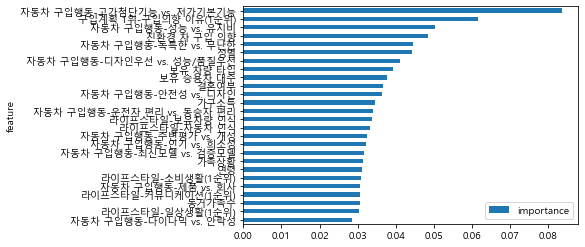

In [1294]:
# 피처 중요도 시각화
pd.DataFrame({'feature': X.columns,
              'importance': xgb.feature_importances_}).sort_values(by='importance').plot(kind='barh', x='feature')

In [1295]:
y_pred = xgb.predict(X_tesㅇㅇt)
(y_pred == 0).sum()

9

In [1296]:
(y_pred == 1).sum()

5734

In [1297]:
(y_pred == 2).sum()

1170

In [98]:
# RandomSearchCV로 최적의 파라메터 값 찾기
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

xgb = XGBClassifier(n_jobs=-1)

max_depth = np.random.randint(3, 20, 100)
learning_rate = np.random.uniform(0.01, 0.1, 100)
n_estimators = np.random.randint(10, 50, 100) * 10

param_distributions = {'max_depth': max_depth,
                       'learning_rate': learning_rate,
                       'n_estimators': n_estimators}

randomsearch_xgb = RandomizedSearchCV(xgb,
                    param_distributions,
                    n_iter=50,
                    scoring=None,
                    n_jobs=None,
                    cv=5,
                    verbose=2,
                    random_state=42)
randomsearch_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END learning_rate=0.04761856221138893, max_depth=3, n_estimators=340; total time=   5.8s
[CV] END learning_rate=0.04761856221138893, max_depth=3, n_estimators=340; total time=   5.8s
[CV] END learning_rate=0.04761856221138893, max_depth=3, n_estimators=340; total time=   5.7s
[CV] END learning_rate=0.04761856221138893, max_depth=3, n_estimators=340; total time=   5.0s
[CV] END learning_rate=0.04761856221138893, max_depth=3, n_estimators=340; total time=   5.1s
[CV] END learning_rate=0.03595743656623755, max_depth=12, n_estimators=440; total time=  38.5s
[CV] END learning_rate=0.03595743656623755, max_depth=12, n_estimators=440; total time=  54.6s
[CV] END learning_rate=0.03595743656623755, max_depth=12, n_estimators=440; total time=  36.3s
[CV] END learning_rate=0.03595743656623755, max_depth=12, n_estimators=440; total time=  47.5s
[CV] END learning_rate=0.03595743656623755, max_depth=12, n_estimators=440; total time= 

[CV] END learning_rate=0.08325916557551964, max_depth=6, n_estimators=320; total time=  10.0s
[CV] END learning_rate=0.08325916557551964, max_depth=6, n_estimators=320; total time=  10.5s
[CV] END learning_rate=0.08325916557551964, max_depth=6, n_estimators=320; total time=  11.8s
[CV] END learning_rate=0.03138580883168906, max_depth=7, n_estimators=400; total time=  21.3s
[CV] END learning_rate=0.03138580883168906, max_depth=7, n_estimators=400; total time=  22.3s
[CV] END learning_rate=0.03138580883168906, max_depth=7, n_estimators=400; total time=  20.1s
[CV] END learning_rate=0.03138580883168906, max_depth=7, n_estimators=400; total time=  15.3s
[CV] END learning_rate=0.03138580883168906, max_depth=7, n_estimators=400; total time=  15.2s
[CV] END learning_rate=0.0724471329832417, max_depth=15, n_estimators=430; total time=  48.2s
[CV] END learning_rate=0.0724471329832417, max_depth=15, n_estimators=430; total time=  48.9s
[CV] END learning_rate=0.0724471329832417, max_depth=15, n_e

[CV] END learning_rate=0.03937638101299601, max_depth=3, n_estimators=270; total time=   4.6s
[CV] END learning_rate=0.0854233608488627, max_depth=14, n_estimators=330; total time=  44.8s
[CV] END learning_rate=0.0854233608488627, max_depth=14, n_estimators=330; total time=  40.3s
[CV] END learning_rate=0.0854233608488627, max_depth=14, n_estimators=330; total time=  33.4s
[CV] END learning_rate=0.0854233608488627, max_depth=14, n_estimators=330; total time=  38.0s
[CV] END learning_rate=0.0854233608488627, max_depth=14, n_estimators=330; total time=  44.0s
[CV] END learning_rate=0.019302249235043274, max_depth=13, n_estimators=490; total time=  43.5s
[CV] END learning_rate=0.019302249235043274, max_depth=13, n_estimators=490; total time=  56.3s
[CV] END learning_rate=0.019302249235043274, max_depth=13, n_estimators=490; total time=  49.4s
[CV] END learning_rate=0.019302249235043274, max_depth=13, n_estimators=490; total time=  49.6s
[CV] END learning_rate=0.019302249235043274, max_dep

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
       250, 170, 180, 440, 170, 320, 190, 120, 180, 280, 150, 220, 280,
       230, 350, 440, 190, 360, 440, 360, 370, 440, 320, 330, 220,

In [99]:
print(randomsearch_xgb.best_estimator_)
print(randomsearch_xgb.best_estimator_.score(X_train, y_train))
print(randomsearch_xgb.best_estimator_.score(X_test, y_test))

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.04761856221138893, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=3, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=340, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=0,
              reg_alpha=0, ...)
0.7301921884686918
0.7170548242441777


In [100]:
pd.DataFrame({'feature': X.columns,
              'importance': randomsearch_xgb.best_estimator_.feature_importances_}).sort_values(by='importance', ascending=False)

,feature,importance
8,자동차 구입행동-고가첨단기능 vs. 저가기본기능,0.150402
15,자동차 구입행동-독특한 vs. 무난한,0.096856
0,구입계획 1위-구입의향 이유(1순위),0.073456
25,친환경 차 구입 의향,0.068866
17,성별,0.066191
11,자동차 구입행동-성능 vs. 유지비,0.049655
10,자동차 구입행동-디자인우선 vs. 성능/품질우선,0.048131
4,라이프스타일-보유차량 인식,0.040269
24,보유 차량 타입,0.038949
23,보유 승용차 대수,0.037507


<AxesSubplot:ylabel='feature'>

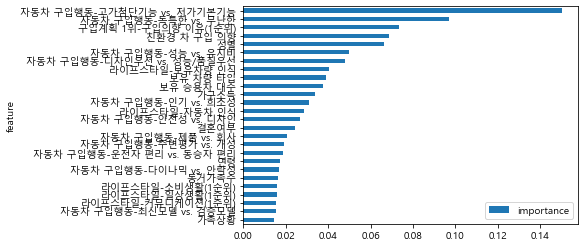

In [101]:
# 피처 중요도 시각화
pd.DataFrame({'feature': X.columns,
              'importance': randomsearch_xgb.best_estimator_.feature_importances_}).sort_values(by='importance').plot(kind='barh', x='feature')

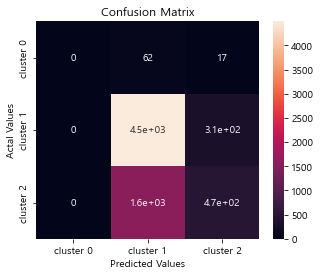

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        79
           1       0.74      0.94      0.82      4810
           2       0.59      0.23      0.33      2024

    accuracy                           0.72      6913
   macro avg       0.44      0.39      0.39      6913
weighted avg       0.68      0.72      0.67      6913

정밀도: 0.4413, 재현율: 0.3891


E:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarn

In [1314]:
# confusion matrix
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt

y_pred = randomsearch_xgb.best_estimator_.predict(X_test)

cm=confusion_matrix(y_test, y_pred)
df_cm= pd.DataFrame(cm,
                    index = ['cluster 0','cluster 1','cluster 2'], 
                    columns = ['cluster 0','cluster 1','cluster 2'])

# 시각화
plt.figure(figsize=(5,4))
sns.heatmap(df_cm, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


print(classification_report(y_test, y_pred))
precision = precision_score(y_test, y_pred, average= "macro")
recall = recall_score(y_test, y_pred, average= "macro")
print('정밀도: {0:.4f}, 재현율: {1:.4f}'.format(precision, recall))

In [102]:
df_clf.columns

Index(['구입계획 1위-구입의향 이유(1순위)', '라이프스타일-소비생활(1순위)', '라이프스타일-일상생활(1순위)',
       '라이프스타일-커뮤니케이션(1순위)', '라이프스타일-보유차량 인식', '라이프스타일-자동차 인식',
       '자동차 구입행동-제품 vs. 회사', '자동차 구입행동-주변평가 vs. 개성',
       '자동차 구입행동-고가첨단기능 vs. 저가기본기능', '자동차 구입행동-최신모델 vs. 검증모델',
       '자동차 구입행동-디자인우선 vs. 성능/품질우선', '자동차 구입행동-성능 vs. 유지비',
       '자동차 구입행동-다이나믹 vs. 안락성', '자동차 구입행동-인기 vs. 희소성',
       '자동차 구입행동-운전자 편리 vs. 동승자 편리', '자동차 구입행동-독특한 vs. 무난한',
       '자동차 구입행동-안전성 vs. 디자인', '성별', '연령[10세]', '결혼여부', '동거가족수', '가족상황',
       '가구소득', '보유 승용차 대수', '보유 차량 타입', '친환경 차 구입 의향', '군집'],
      dtype='object')

In [103]:
df_clf.iloc[:, 0].value_counts()

디자인      5021
성능       4270
품질       3788
친환경      1938
활용성      1924
브랜드      1377
합리성      1371
모델 명성    1088
최신        995
기타        742
혜택        529
Name: 구입계획 1위-구입의향 이유(1순위), dtype: int64